# 실습1 다중선형회귀의 기본가정 검정하기
### 다중선형회귀의 기본가정을 코드로 검증하는 방법에 대해 학습합니다.

### 회귀 분석 전 vs. 후 검증할 수 있는 가정 정리
회귀 분석 전: 선형성, 독립성, 오차항 자기상관 없다(데이터 형태를 보고 간접적으로 검증 가능)<br>
회귀 분석 후: 오차항 평균이 0이다, 등분산성, 정규성, 오차항 자기상관 없다(최종 검증)

### 회귀 분석 전

### 1.1 선형성(linearity)

회귀선을 시각화해보겠습니다.

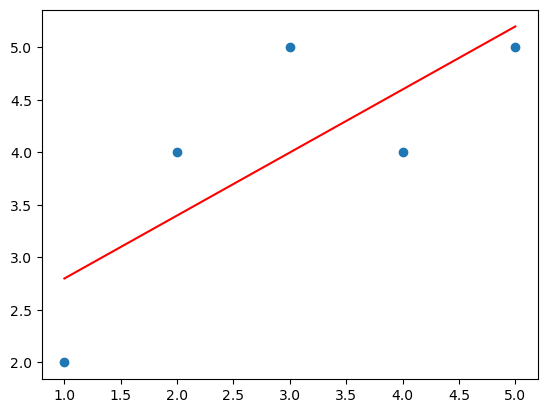

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터프레임 생성
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 5, 4, 5]})

# 선형 회귀 모델 생성 및 학습
model = *******************  ## model이라는 변수에 함수를 저장합니다.
model.***(data[['x']], data['y'])  # 회귀분석을 해주는 함수 뭐였죠?

# 회귀선 그리기
y_pred = model.*******(data[['x']])

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], y_pred, color='red')
plt.show()

### 1.2 독립성(Independence) or 다중공선성(multicolinearity)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 무작위 데이터 생성
np.random.seed(2024)
data = pd.DataFrame({'x1': np.random.normal(0, 1, 50),
                     'x2': np.random.normal(0, 1, 50),
                     'x3': np.random.normal(0, 1, 50),
                     'x4': np.random.normal(0, 1, 50),
                     'y': np.random.normal(0, 1, 50)})

# 다중공선성 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
print(vif)

   VIF Factor features
0    1.016001       x1
1    1.265742       x2
2    1.086735       x3
3    1.158878       x4
4    1.167848        y


- 각 변수에 대해 VIF(분산팽창지수)가 (   )미만이므로 다중공선성이 (있다고/없다고) 할 수 있다.

### 회귀 모델 사용 후

### 1.3 등분산성(Homoscedasticity)

#### 잔차의 도표화

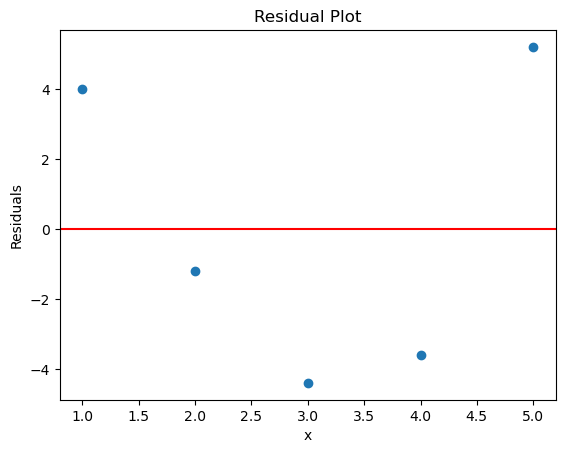

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 8, 16, 32]})

# 선형 회귀 모델 생성 및 학습
model = *******************  ## model이라는 변수에 함수를 저장합니다.
model.***(data[['x']], data['y'])  # 선형성과 같은 함수 쓰시면 됩니다.

# 잔차 그래프 그리기
y_pred = model.*******(data[['x']])

# 잔차 = 실제 데이터값 - 예측한 데이터값
residuals = ******* - *******

# 그래프 그리기
plt.scatter(data['x'], residuals)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 1.4. 오차항의 평균이 0이다

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(42)
X = np.random.rand(10, 1) * 10  # 0~10 사이 랜덤 값
true_beta = 3.5
Y = true_beta * X.flatten() + np.random.randn(10) * 2  # 노이즈 포함
data = pd.DataFrame({'X': X.flatten(), 'Y': Y})

# 선형 회귀 모델 적용
model = LinearRegression()
model.fit(data[['X']], data['Y'])

# 잔차 계산 및 평균 출력
y_pred = model.*******(data[['X']])  # 예측값
residuals = data['Y'] - ******  # 잔차 계산
residual_mean = np.****(residuals)  # 잔차 평균 계산

print("\n오차항(Residuals)의 평균:", residual_mean)


오차항(Residuals)의 평균: 1.9539925233402757e-15


1.95e-15는 e의 -15제곱이므로 매우 작은 값입니다. 따라서 0에 가까운 값입니다.

### 1.5. 오차항 자기상관 없다

분석 전에는 데이터 특성을 살펴보며 오차항 자기상관 여부를 확인한다.
- 시계열 데이터인지
- 데이터가 특정 그룹으로 묶여 있는지(같은 지역, 같은 연령대 등에서 수집된 데이터)<br>

분석 후에는 Durbin-Watson 검정으로 오차항 자기상관 여부를 확인한다.

#### 1.5.1. Durbin-Watson 검정

Durbin-Watson 검정은 잔차(residual) 사이의 자기상관이 존재하는지 확인하는데 사용한다.
- DW > 2: 음의 자기상관 가능성
- DW < 2: 양의 자기상관 가능성
- DW = 2(2에 근접한 값): 자기상관 없음

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from statsmodels.stats.stattools import durbin_watson

# 예제 데이터 생성
np.random.seed(42)
X = np.random.rand(10, 1) * 10  # 0~10 사이 랜덤 값
true_beta = 3.5
noise = np.random.normal(loc=0, scale=1, size=10)  # 평균 0, 표준편차 1인 정규분포 노이즈
Y = true_beta * X.flatten() + noise  # 노이즈 포함
data = pd.DataFrame({'X': X.flatten(), 'Y': Y})

# 선형 회귀 모델 적용
model = LinearRegression()
model.***(data[['X']], data['Y'])

# 잔차 계산
y_pred = model.predict(data[['X']])  # 예측값
residuals = ******** - ***** # 잔차 계산

# Durbin-Watson Test 실행
dw_stat = durbin_watson(residuals)

print(f"\nDurbin-Watson 통계량: {dw_stat}")


Durbin-Watson 통계량: 2.134769842115087


DW 값이 2에 근접한 값이므로 자기상관이 없다고 판단 가능하다.

### 1.6 정규성(normality)

#### 1.6.1 샤피로 윌크 검정:
- null hypothesis(H0; 귀무가설): "데이터가 정규분포를 따른다"  
- Alternative hypothesis(H1; 대립가설): "데이터가 정규분포를 따르지 않는다"

In [ ]:
from scipy.stats import shapiro

# 데이터 생성
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 8, 16, 32]})

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(data[['x']], data['y'])

# 잔차 계산을 이번엔 y_pred 변수 없이 바로 해봅시다.
residuals = ****** - ************************

# Shapiro-Wilk 검정
_, p_value = shapiro(residuals)  ## p-value값 얻기 위한 tuple unpacking
print(f'Shapiro-Wilk p-value: {p_value:.3f}')

Shapiro-Wilk p-value: 0.303


- p-value가 (     )으로 일반적인 유의수준인 0.05로 (크므로/작으므로) (귀무가설을 기각할 수 없다/귀무가설을 기각한다)

#### 1.6.2 Q-Q plot
- 데이터가 특정 분포(정규 분포)를 따르는지 시각적으로 확인하는 방법
- 데이터가 빨간 대각선 위에 거의 일직선으로 위치하면 정규 분포를 따른다고 볼 수 있다.
- 데이터들이 한쪽으로 휘어져 있는 경우 정규 분포를 따르지 않는다.

#### 정규분포인 경우

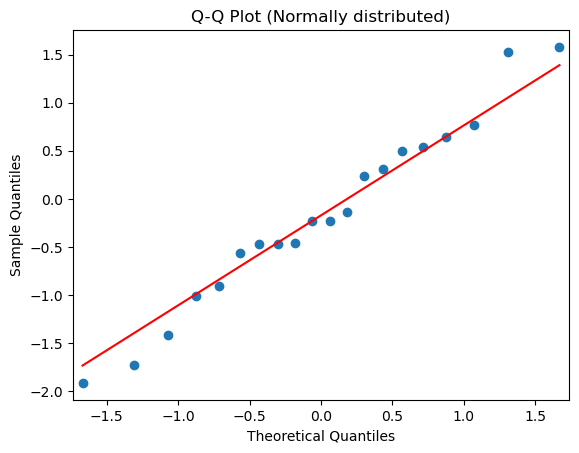

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 정규 분포를 따르는 데이터 생성
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=20) # loc: 평균, scale: 표준편차

# Q-Q Plot 그리기
sm.qqplot(data, line='s')
plt.title("Q-Q Plot (Normally distributed)")
plt.show()


#### 정규분포가 아닌 경우

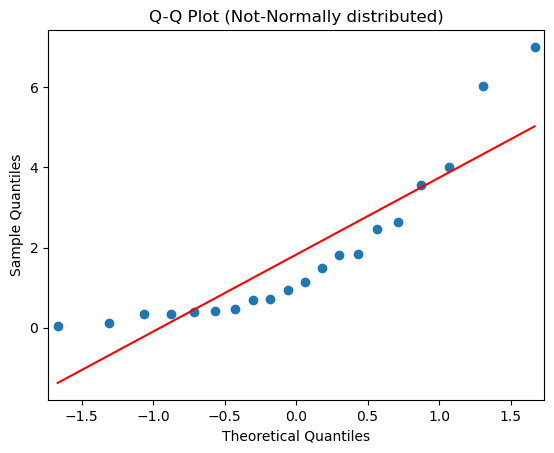

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 정규 분포가 아닌 데이터 생성 (오른쪽으로 치우친 분포)
np.random.seed(42)
data = np.random.exponential(scale=2, size=20)

# Q-Q Plot 그리기
sm.qqplot(data, line='s')
plt.title("Q-Q Plot (Not-Normally distributed)")
plt.show()

#### 샤피로 윌크 검정의 예시를 보면 (1.6.1. 샤피로 윌크 검정에서의 예시)

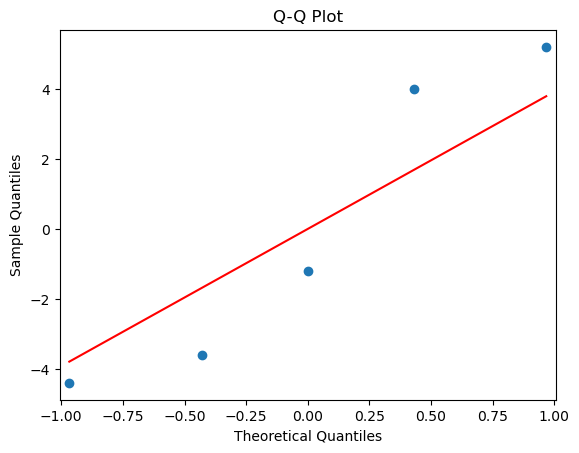

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 8, 16, 32]})

model = LinearRegression()
model.*****

residuals = ****** - ************************

qqplot(residuals, line='s')
plt.title("Q-Q Plot")
plt.show()

데이터가 빨간 선 위에 일직선으로 놓여있지 않으므로 정규 분포가 아닐 것 같다<br>
정확한 결과는 위의 샤피로 윌크 검정처럼 수치 값 계산해서 확인

# 실습2 비선형 회귀모델 적용하기

## 2.1 선형 회귀 vs. 다항 회귀

#### 저번 세션과 같은 보스턴 집값 데이터셋으로 학습해보겠습니다
먼저 데이터셋을 불러와주세요

In [ ]:
df = pd.********('./house_price.csv')   ## 파일경로에 맞게 수정


df.****()   ## 첫 5 row 출력해서 제대로 불러와졌는지 확인

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  CAT.MEDV  
0  396.90   4.98  24.0         0  
1  396.90   9.14  21.6         0  
2  392.83   4.03  34.7         1  
3  394.63   2.94  33.4         1  
4  396.90   5.33  36.2         1

### 참고: 데이터셋 구조
데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

독립 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

종속 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

이 중 LSTAT 칼럼과 MEDV 칼럼간 선형회귀 분석을 해보겠습니다.

In [ ]:
#선형 회귀
# X에는 LSTAT 칼럼의 values를, y에는 MEDV 칼럼의 values를 할당해줍니다
X = ********************
y = ********************

# model로 선형회귀 클래스를 담아주고, 회귀분석을 진행합니다.
regr = ********************
regr.***(*, *)

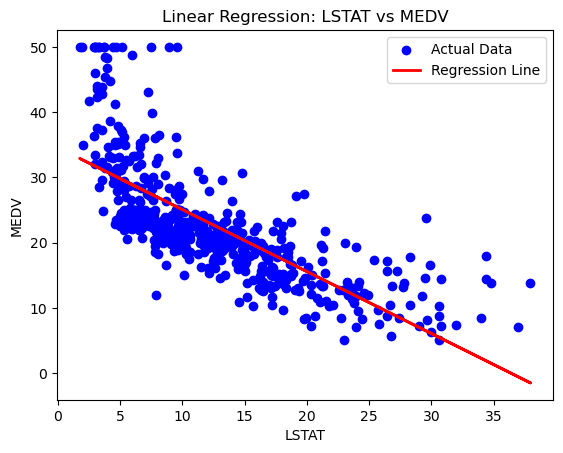

In [ ]:
# 시각화
# 회귀선과 실제 데이터값을 그래프로 나타내 봅니다.

# 모델을 사용하여 입력 데이터 X에 대한 예측 수행
y_pred=regr.*********

# 실제 데이터는 scatter함수를 이용하여 color는 blue로, label은 Actual Data로 설정합니다.
plt.***************

# 회귀선은 plot 함수를 이용하여 color는 red로, linewidth(lw)는 2로, label은 Regression Line로 설정합니다. y값에 반드시 유의하세요!!
plt.***************


plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Linear Regression: LSTAT vs MEDV')
plt.legend()
plt.show()

### 직선으로 표현하기엔 애매하다는 느낌이 듭니다. **그렇다면?**

In [ ]:
# X, y 컬럼 선택 후, 선형회귀 클래스를 regr 변수에 담습니다.
X= df[['LSTAT']].values
y= df['MEDV'].values
regr = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

#이차, 삼차 다항식 특성을 만듭니다
# PolynomialFeatures 클래스는 degree 인자를 지원합니다. 각각 변수 이름에 맞는 차수로 설정해주세요.
quadratic = PolynomialFeatures(********)
cubic = PolynomialFeatures(********)

# 앞서 만든 변수를 이용해 X값을 바꾸어줍니다.
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.************(X)

In [ ]:
# 학습된 모델을 그리기 위해 특성 범위를 만듭니다.
X_fit = np.arange(X.min(), X.max(), 1)[:, np. newaxis]

In [ ]:
#다시 예측을 해봅니다
#선형회귀 버전
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [ ]:
# 2차식 버전
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [ ]:
# 3차식 버전
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#### 이제 결과 그래프를 그려봅시다

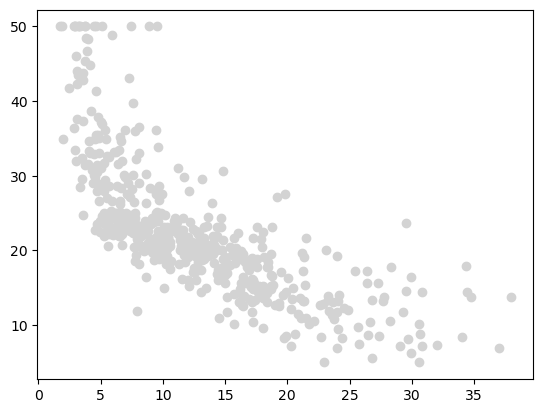

In [ ]:
# trainint point를 color를 lightgray로 설정하여 배경처럼 보이게 설정
plt.scatter(X, y, label='training points', color='lightgray')

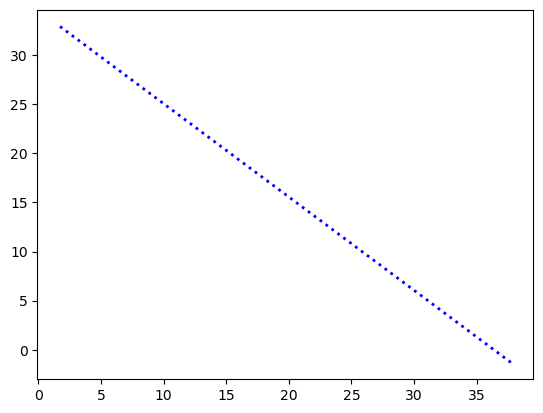

In [ ]:
# 1차식
plt.plot(X_fit, *********, label='Linear (d=1), $R^2=%.2f$' %linear_r2, color='blue', lw=2, linestyle=':')

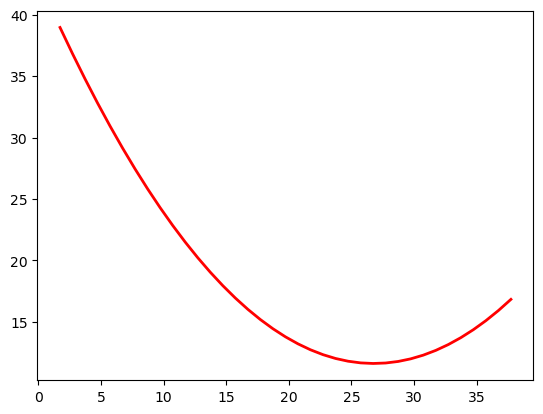

In [ ]:
# 2차식
plt.plot(X_fit, *********, label='Quadratic (d=2), $R^2=%.2f$' %quadratic_r2, color='red', lw=2, linestyle='-')

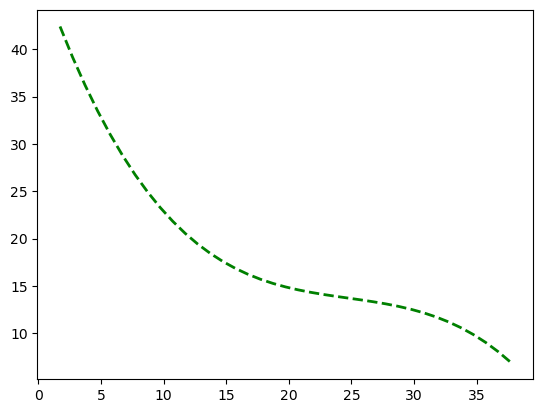

In [ ]:
# 3차식
plt.plot(X_fit, *********, label= 'Cubic (d=3), $R^2=%.2f$' %cubic_r2, color= 'green', lw=2, linestyle='--')

#### train data에 어떤 회귀선이 가장 적합한지 하나의 그래프에 겹쳐 그려보겠습니다

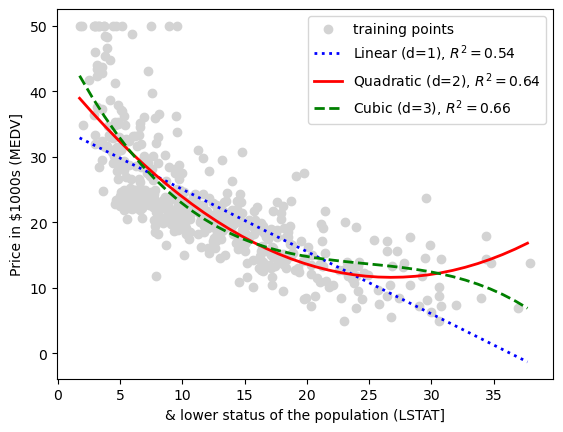

In [ ]:
# 이제 한 데 모아서 그리면?
plt.scatter(X, y, label='training points', color='lightgray')

# 앞서 그린 세 개의 회귀선 코드를 그대로 가져오세요.
***
***
***

plt.xlabel('& lower status of the population (LSTAT]')
plt.ylabel('Price in $1000s (MEDV]')
plt.legend(loc='upper right')
plt.show()

#### 1,2,3차식 순서로 fit한 모습을 볼 수 있습니다. 그리고, 이는 결정계수값의 크기순과 동일합니다.

### 하지만 특성(feature)을 변환하면 굳이 비선형 함수를 쓰지 않아도 됩니다.
두 변수의 관계를 잘 살펴보면, f(x) = exp(-x) 관계와 매우 비슷할 것 같다는 추측이 가능합니다.   (우하향하는 지수함수)
만약 그렇다면, 양변에 로그를 취하면 log(f(x)) = -x 가 됩니다. 즉, feature에 로그 변환을 적용하면 간단한 직선으로 두 변수의 관계를 나타낼 수 있습니다.

In [ ]:
# 특성을 변환합니다
# X에는 로그를 취하고, y는 루트를 씌워줍니다.
X_log = np.***(X)
y_sqrt = np.****(y)

In [ ]:
# 학습된 모델을 그리기 위해 특성 범위를 만들고 회귀선을 만듭니다.
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

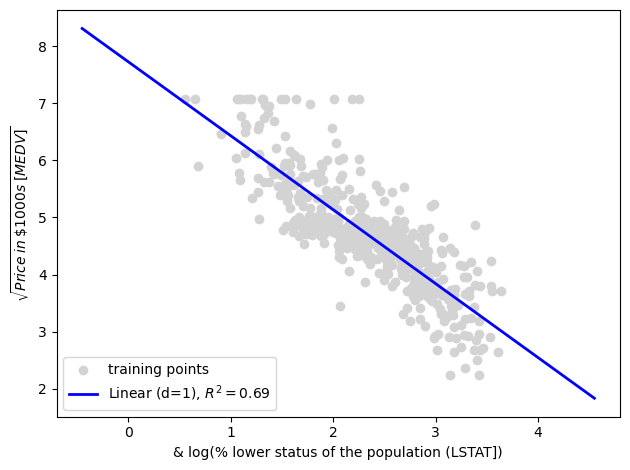

In [ ]:
#결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='Linear (d=1), $R^2=%.2f$' %linear_r2, color='blue', lw=2)
plt.xlabel('& log(% lower status of the population (LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**데이터에 로그 변환을 취하니 앞서 만든 다항식 회귀모델보다 모델도 간단하고,  
지수 변환을 통한 선형 모델의 설명력(R^2)이 더 높은 것을 알 수 있습니다.**

### -> 결국, 비선형 회귀모델은 선형 회귀 모델의 확장판임을 알 수 있습니다.

## 2.2 지수 회귀 vs. 로그 회귀 vs. 스플라인 회귀

### 2.2.1 각각의 데이터 상황에 대해

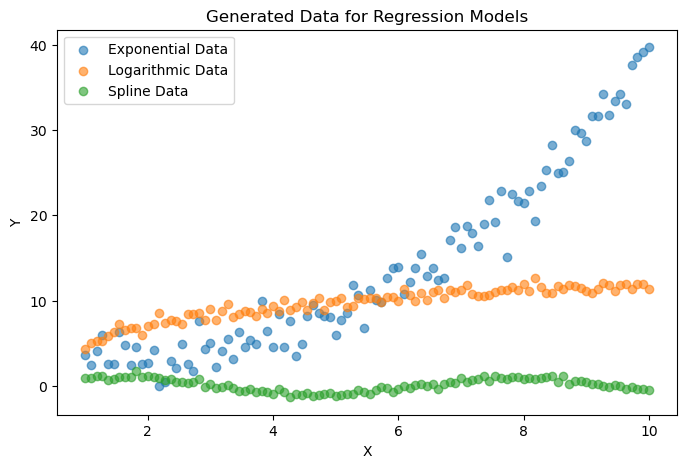

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 임의의 데이터 생성
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)
Y_exp = 2 * np.exp(0.3 * X).flatten() + np.random.normal(0, 2, X.shape[0])  # 지수 회귀를 위한 데이터
Y_log = 5 + 3 * np.log(X).flatten() + np.random.normal(0, 0.5, X.shape[0])  # 로그 회귀를 위한 데이터
Y_spline = np.sin(X).flatten() + np.random.normal(0, 0.2, X.shape[0])  # 스플라이 회귀를 위한 데이터

# 데이터 시각화
plt.figure(figsize=(8,5))
plt.scatter(X, Y_exp, label="Exponential Data", alpha=0.6)
plt.scatter(X, Y_log, label="Logarithmic Data", alpha=0.6)
plt.scatter(X, Y_spline, label="Spline Data", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Generated Data for Regression Models")
plt.show()

#### 지수 회귀 모델

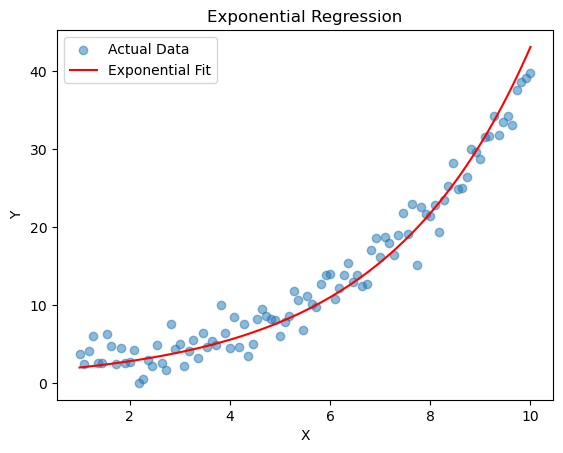

In [ ]:
import statsmodels.api as sm
# Y_exp(지수 회귀를 위한 데이터)에 지수 회귀 적용->log 변환 후 선형 회귀

log_Y_exp = np.log(Y_exp)  # 로그 변환

# 회귀 모델 학습
X_const = sm.add_constant(X)  # 절편 추가
model_exp = sm.OLS(log_Y_exp, X_const).fit()

# 예측 및 변환 (exp 적용)
log_Y_exp_pred = model_exp.predict(X_const)
Y_exp_pred = np.exp(log_Y_exp_pred)

# 시각화
plt.scatter(X, Y_exp, label="Actual Data", alpha=0.5)
plt.plot(X, Y_exp_pred, label="Exponential Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Exponential Regression")
plt.show()

### 로그 회귀 모델

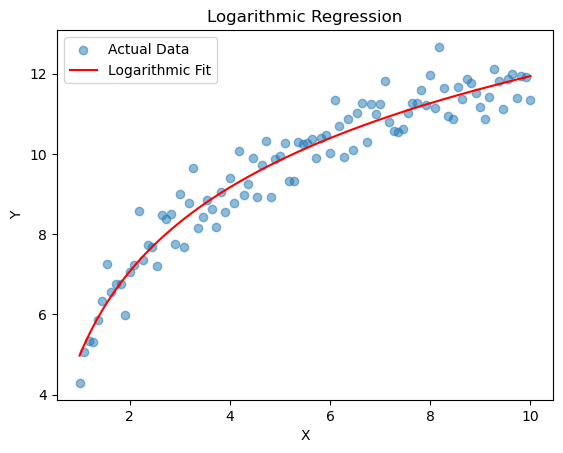

In [ ]:
# X에 로그 변환 후 선형 회귀 적용

log_X = np.log(X)

# 회귀 모델 학습
log_X_const = sm.add_constant(log_X)
model_log = sm.OLS(Y_log, log_X_const).fit()

# 예측
Y_log_pred = model_log.predict(log_X_const)

# 시각화
plt.scatter(X, Y_log, label="Actual Data", alpha=0.5)
plt.plot(X, Y_log_pred, label="Logarithmic Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Logarithmic Regression")
plt.show()

### 스플라인 회귀 모델

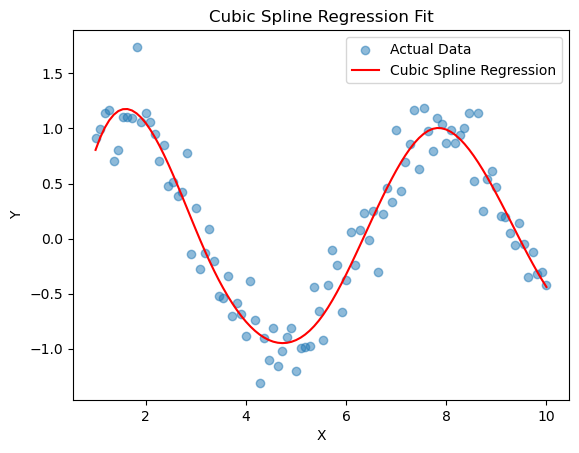

In [ ]:
from patsy import dmatrix
import statsmodels.api as sm

# B-Spline 변환
X_spline = dmatrix("bs(X, df=6, degree=3, include_intercept=False)", {"X": X}, return_type='dataframe')

# 스플라인 회귀 모델 학습
model_spline = sm.OLS(Y_spline, X_spline).fit()

# 예측
Y_spline_pred = model_spline.predict(X_spline)

# 시각화
plt.scatter(X, Y_spline, label="Actual Data", alpha=0.5)
plt.plot(X, Y_spline_pred, label="Cubic Spline Regression", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Cubic Spline Regression Fit")
plt.show()

### 2.2.2 공통된 데이터에 대해

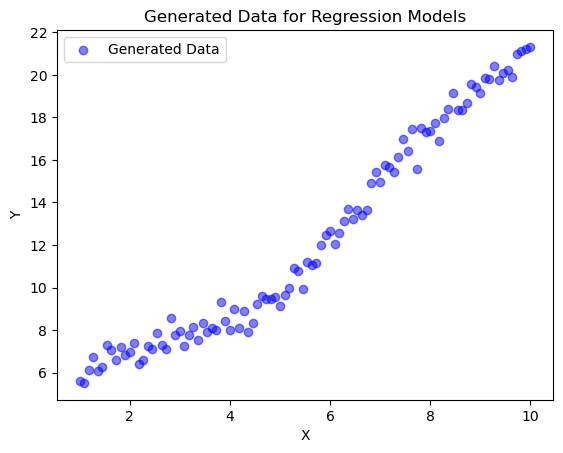

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공통된 임의의 데이터 생성
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)
Y = 2 * np.exp(0.2 * X).flatten() + 3 * np.log(X + 1).flatten() + np.sin(X).flatten() + np.random.normal(0, 0.5, X.shape[0])

# 데이터 시각화
plt.scatter(X, Y, label="Generated Data", color="blue", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Generated Data for Regression Models")
plt.show()

공통된 데이터에 위의 지수 회귀, 로그 회귀, 스플라인 회귀를 적용하면

지수 회귀 모델

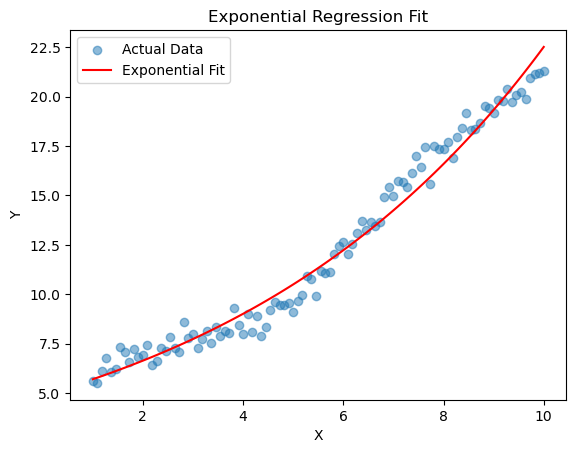

In [ ]:
import statsmodels.api as sm

# Y에 로그 변환 후 선형 회귀 적용
log_Y = np.***(Y)  # 로그 변환

# 회귀 모델 학습
X_const = sm.add_constant(X)
model_exp = sm.OLS(log_Y, X_const).fit()

# 예측 및 변환 (exp 적용)
log_Y_pred = model_exp.*******(X_const)
Y_exp_pred = np.***(log_Y_pred)

plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_exp_pred, label="Exponential Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Exponential Regression Fit")
plt.show()

로그 회귀 모델

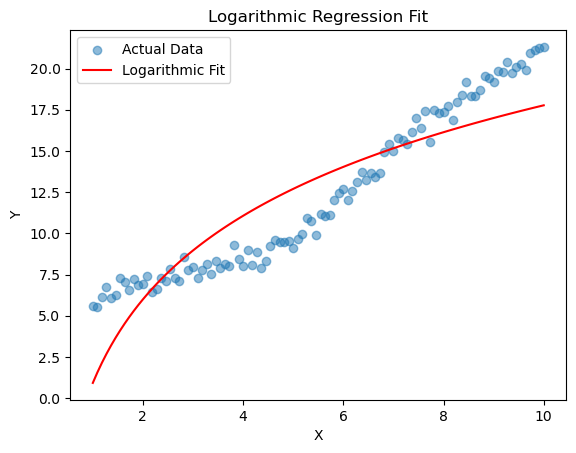

In [ ]:
# X에 로그 변환 후 선형 회귀 적용
log_X = np.***(X)

# 회귀 모델 학습
log_X_const = sm.add_constant(log_X)
model_log = sm.OLS(Y, log_X_const).fit()

# 예측
Y_log_pred = model_log.*******(log_X_const)

# 시각화
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_log_pred, label="Logarithmic Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Logarithmic Regression Fit")
plt.show()

스플라인 회귀 모델

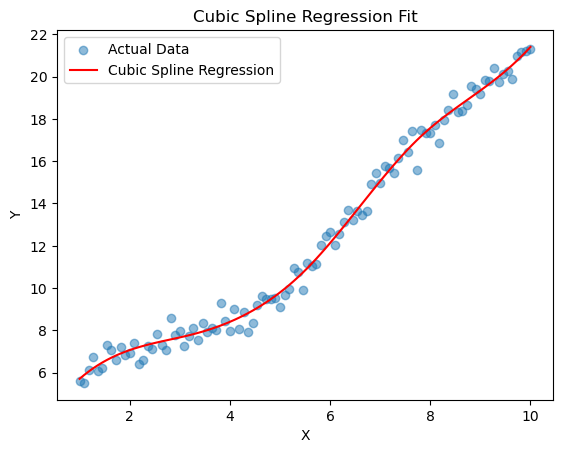

In [ ]:
from patsy import dmatrix

# B-Spline 변환. 아래의 ***에 df는 6, degree는 3으로 설정합니다. (df와 degree 값 변경하며 확인해보셔도 좋아요)
X_spline = dmatrix("bs(X, ****, ********, include_intercept=False)", {"X": X}, return_type='dataframe')

# 스플라인 회귀 모델 학습
model_spline = sm.OLS(Y, X_spline).fit()

# 예측
Y_spline_pred = model_spline.*******(X_spline)

# 시각화
plt.scatter(X, Y, label="Actual Data", alpha=0.5)
plt.plot(X, Y_spline_pred, label="Cubic Spline Regression", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Cubic Spline Regression Fit")
plt.show()

### 데이터 상황에 따라 회귀 모델을 선택하여 사용하면 됩니다

# 실습3 C2C 패션 회사의 user data 분석


#### 이번 실습은 C2C 패션 회사의 user data를 선형회귀모델을 이용한 분석을 진행하는 내용입니다.
#### 회귀모델을 적용하는 과정을 천천히 따라와주세요!


## Fashion Dataset
이 데이터셋은 예전 유럽 패션기업의 유저 데이터 중 일부입니다. 매출에 영향을 주는 변수들이 어떤 것이 있는지 회귀분석을 통하여 간단하게 검증해보고자 합니다.

### 데이터 준비 및 전처리
productsSold 칼럼을 예측하기 위해서 나머지 칼럼들을 설명변수로 활용하려고 합니다.  
다만 모든 변수를 활용할 수는 없으니, EDA를 통해 활용할 몇 가지 칼럼을 추려보고자 합니다.

먼저 데이터셋부터 불러와야겠죠?

In [ ]:
df = pd.read_csv('./fashion_company_users.csv')  ##저장경로에 맞게 설정
df.head()

index       identifierHash  type     country language  socialNbFollowers  \
0      0 -7279641312655250028  user  Etats-Unis       en                  3   
1      1 -1456013578740053406  user   Allemagne       de                  3   
2      2  9006282053848196165  user       Suède       en                  3   
3      3 -7154634866120535654  user     Turquie       en                  3   
4      4  2858299215060733023  user      France       en                  3   

   socialNbFollows  socialProductsLiked  productsListed  productsSold  ...  \
0                8                    0               0             0  ...   
1                8                    0               0             0  ...   
2                8                    0               0             0  ...   
3                8                    0               0             0  ...   
4                8                    0               0             0  ...   

   civilityTitle  hasAnyApp  hasAndroidApp hasIosApp  hasProfilePicture  \
0            mrs      False          False     False               True   
1            mrs      False          False     False               True   
2             mr       True          False      True               True   
3            mrs      False          False     False               True   
4             mr       True          False      True               True   

  daysSinceLastLogin  seniority  seniorityAsMonths  seniorityAsYears  \
0                709       3205             106.83               8.9   
1                709       3205             106.83               8.9   
2                689       3205             106.83               8.9   
3                709       3205             106.83               8.9   
4                709       3205             106.83               8.9   

   countryCode  
0           us  
1           de  
2           se  
3           tr  
4           fr  

[5 rows x 25 columns]

데이터셋이 어떻게 생겼는지는 알아야겠죠

In [ ]:
# 기본적으로 사용하는 라이브러리인 pandas, matplotlib.pyplot, seaborn을 불러와주세요.
# 관용적으로 각각 pd, plt, sns 로 축약합니다.

****
****
****

In [ ]:
# 1. 데이터 기본 정보 확인
print("데이터셋의 기본 정보:")
df.****()


데이터셋의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                98913 non-null  int64  
 1   identifierHash       98913 non-null  int64  
 2   type                 98913 non-null  object 
 3   country              98913 non-null  object 
 4   language             98913 non-null  object 
 5   socialNbFollowers    98913 non-null  int64  
 6   socialNbFollows      98913 non-null  int64  
 7   socialProductsLiked  98913 non-null  int64  
 8   productsListed       98913 non-null  int64  
 9   productsSold         98913 non-null  int64  
 10  productsPassRate     98913 non-null  float64
 11  productsWished       98913 non-null  int64  
 12  productsBought       98913 non-null  int64  
 13  gender               98913 non-null  object 
 14  civilityGenderId     98913 non-null  int64  
 15  civilityTitle        98

In [ ]:
print("\n데이터셋의 기초 통계:")
print(df.*********())

print("\n컬럼별 결측값 확인:")
print(df.************)


데이터셋의 기초 통계:
              index  identifierHash  socialNbFollowers  socialNbFollows  \
count  98913.000000    9.891300e+04       98913.000000     98913.000000   
mean   49456.000000   -6.692039e+15           3.432269         8.425677   
std    28553.867925    5.330807e+18           3.882383        52.839572   
min        0.000000   -9.223101e+18           3.000000         0.000000   
25%    24728.000000   -4.622895e+18           3.000000         8.000000   
50%    49456.000000   -1.337989e+15           3.000000         8.000000   
75%    74184.000000    4.616388e+18           3.000000         8.000000   
max    98912.000000    9.223331e+18         744.000000     13764.000000   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
count         98913.000000    98913.000000  98913.000000      98913.000000   
mean              4.420743        0.093304      0.121592          0.812303   
std             181.030569        2.050144      2.126895          8.500205  

In [ ]:
# 2. 범주형 변수의 분포 확인
print("\n범주형 변수의 고유값 확인:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}의 고유값 분포:")
    print(df[col].value_counts())


범주형 변수의 고유값 확인:

type의 고유값 분포:
type
user    98913
Name: count, dtype: int64

country의 고유값 분포:
country
France                            25135
Etats-Unis                        20602
Royaume-Uni                       11310
Italie                             8015
Allemagne                          6567
                                  ...  
Île Norfolk                           1
Géorgie du Sud / Iles Sandwich        1
Gibraltar                             1
Antilles néerlandaises                1
Île de Man                            1
Name: count, Length: 200, dtype: int64

language의 고유값 분포:
language
en    51564
fr    26372
it     7766
de     7178
es     6033
Name: count, dtype: int64

gender의 고유값 분포:
gender
F    76121
M    22792
Name: count, dtype: int64

civilityTitle의 고유값 분포:
civilityTitle
mrs     75684
mr      22792
miss      437
Name: count, dtype: int64

countryCode의 고유값 분포:
countryCode
fr    25135
us    20602
gb    11310
it     8015
de     6567
      ...  
bl        1
um      


수치형 변수의 히스토그램:


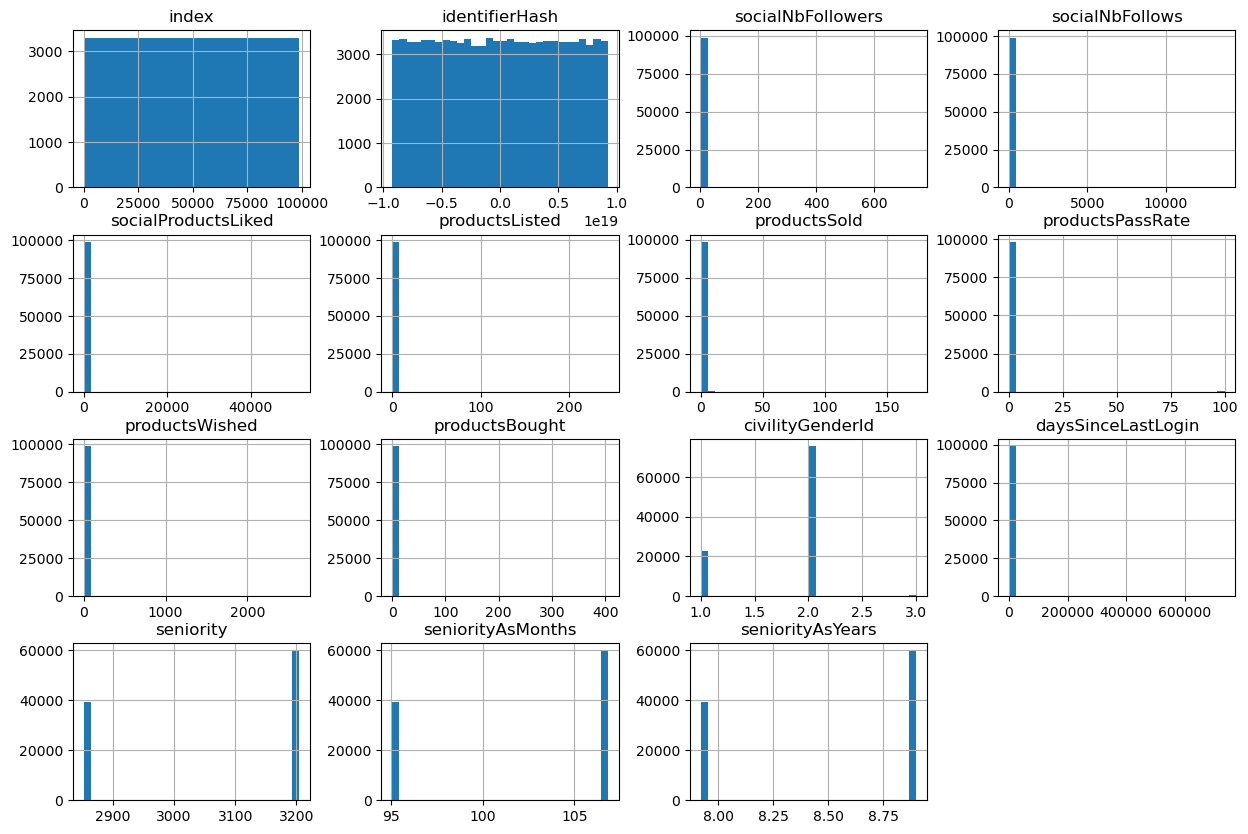

In [ ]:
# 3. 수치형 변수의 분포 확인
print("\n수치형 변수의 히스토그램:")
df.hist(bins=30, figsize=(15, 10))
plt.show()


범주형 변수와 수치형 변수 간의 관계 시각화:


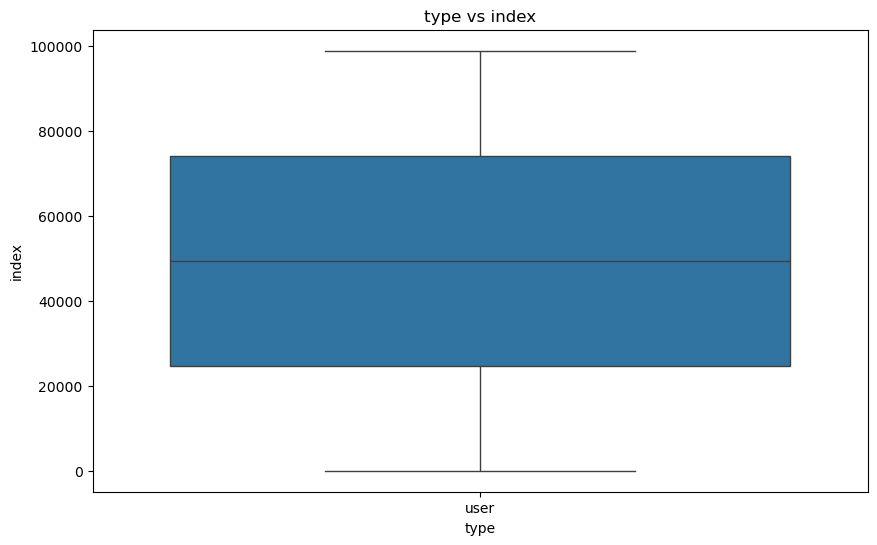

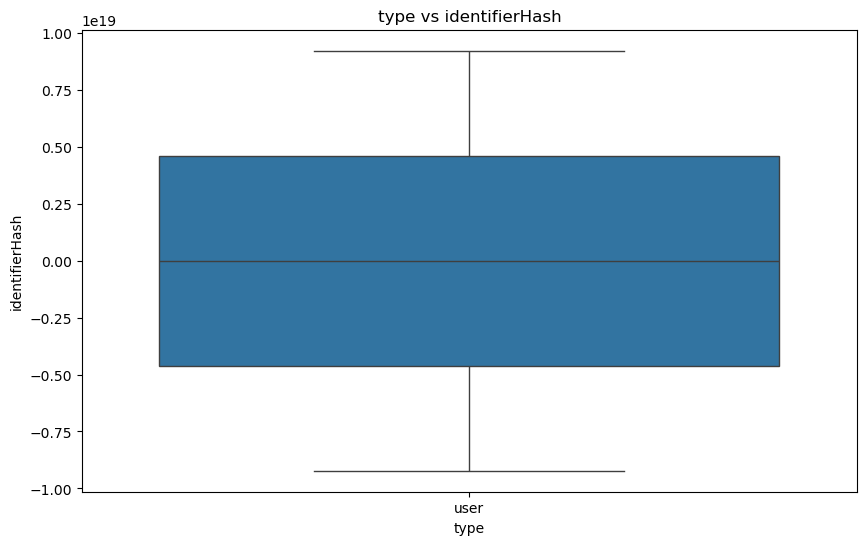

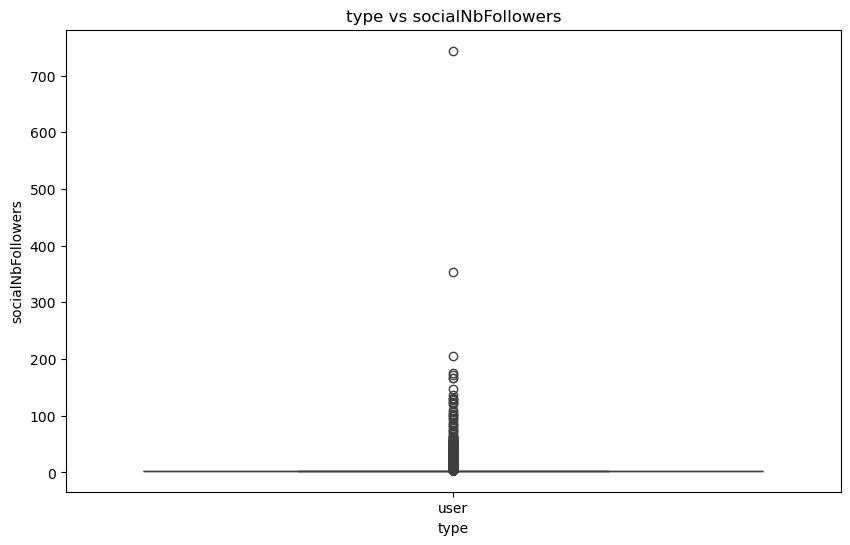

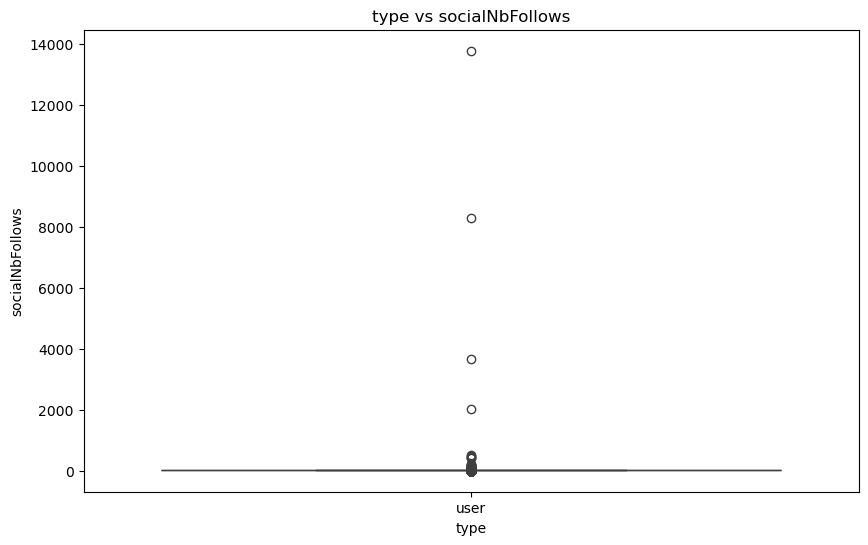

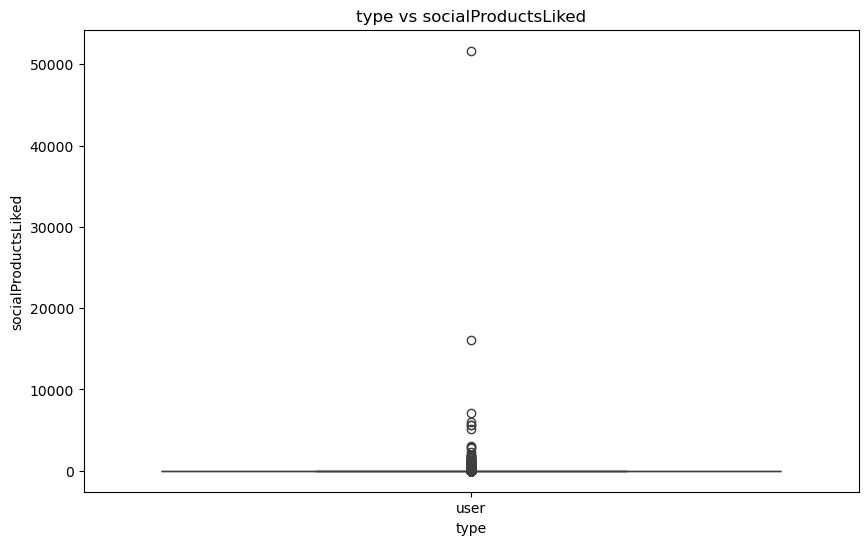

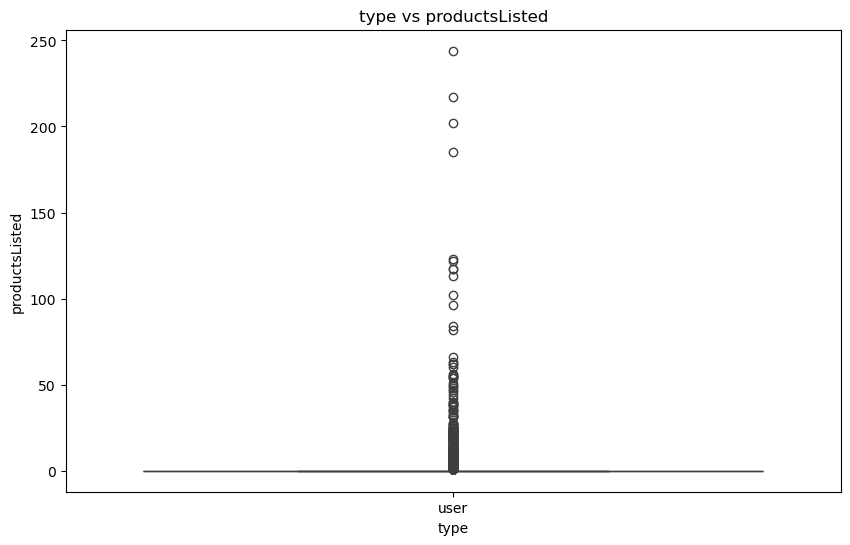

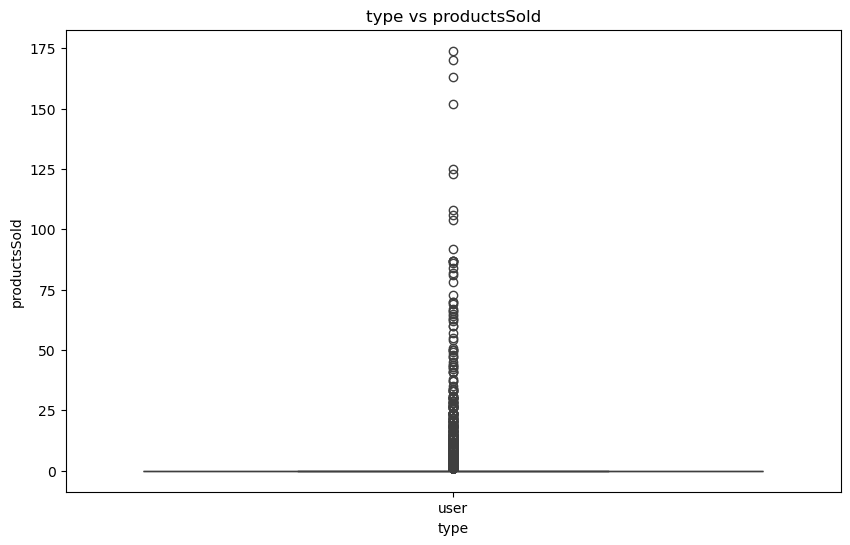

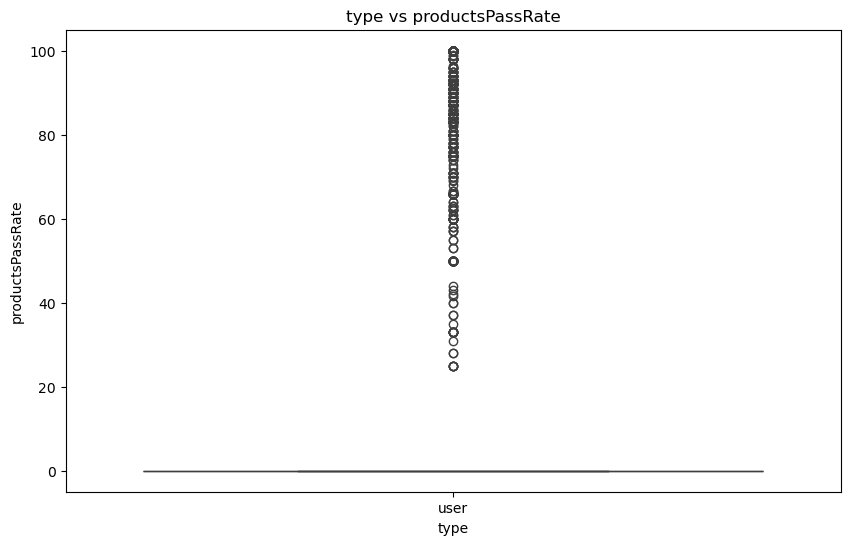

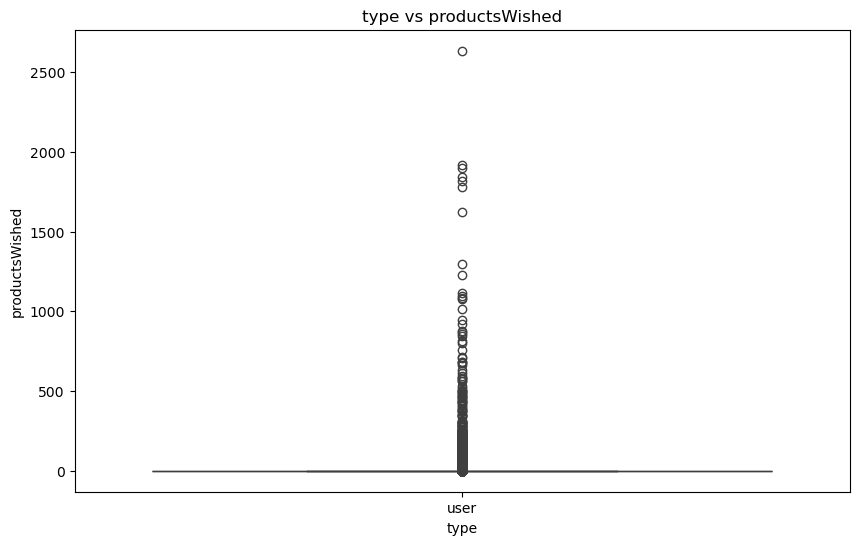

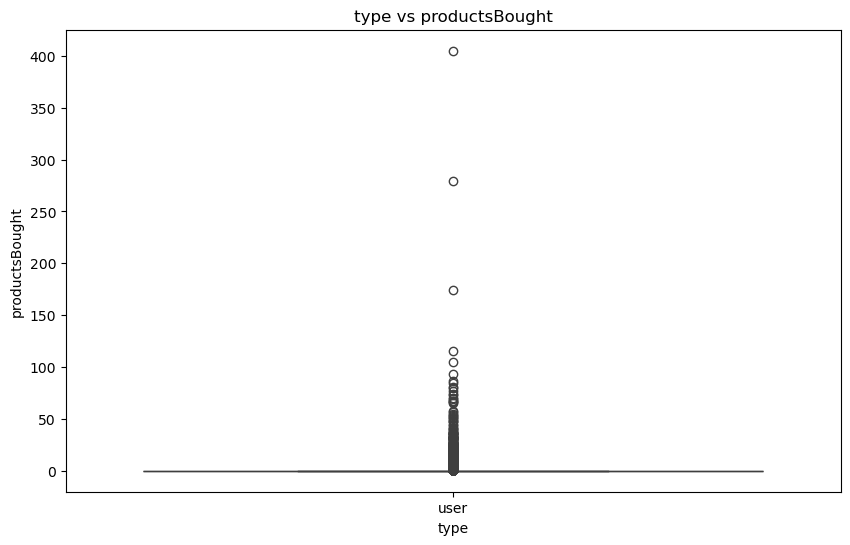

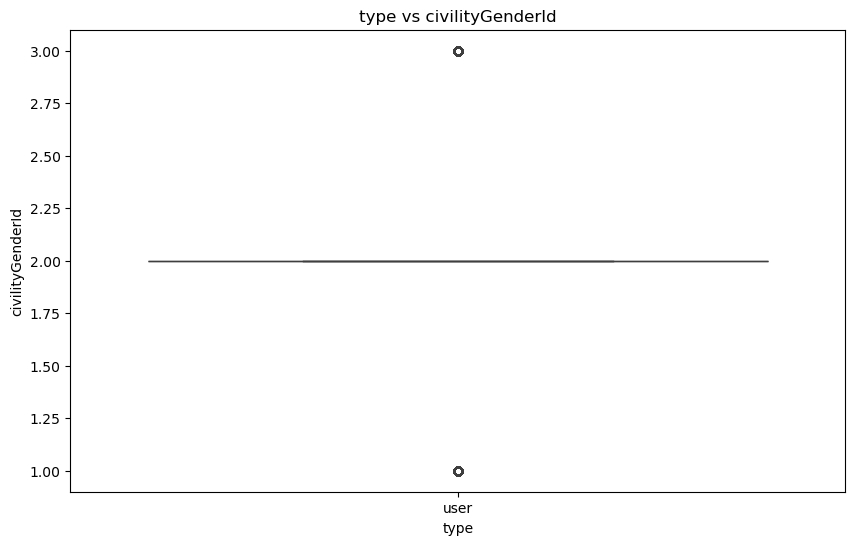

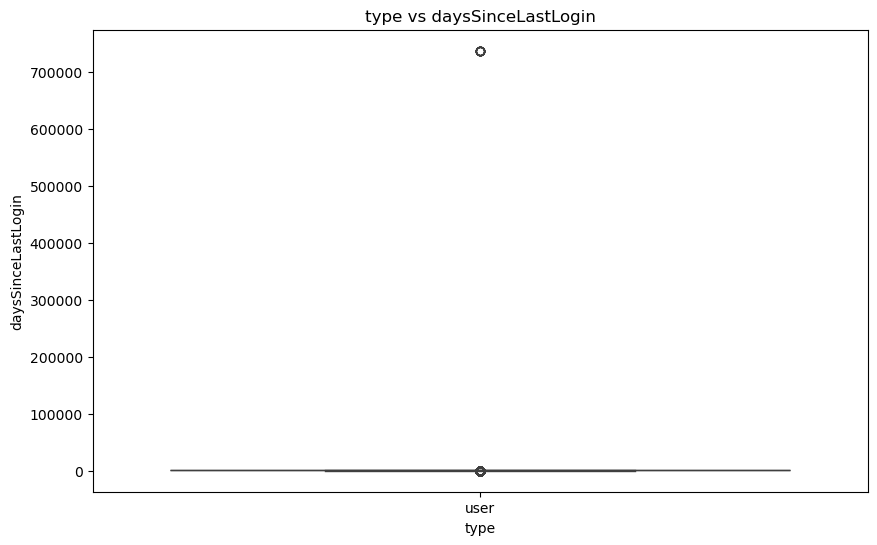

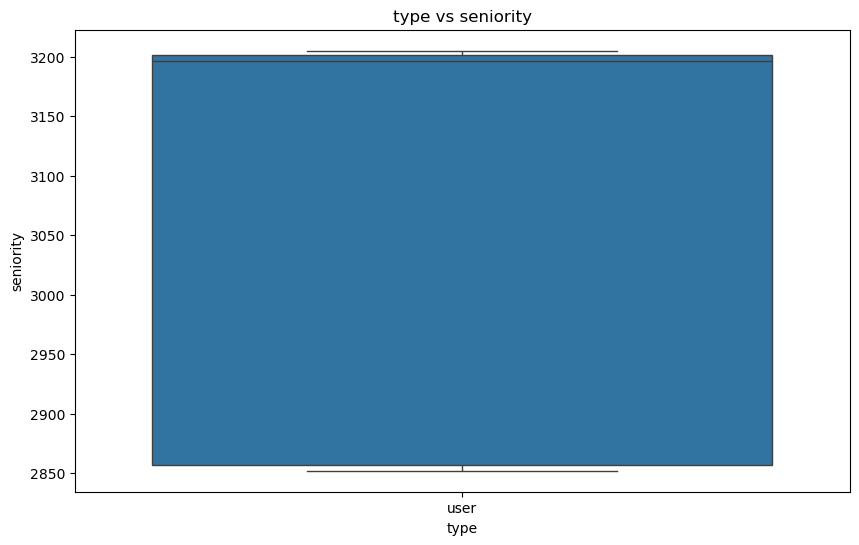

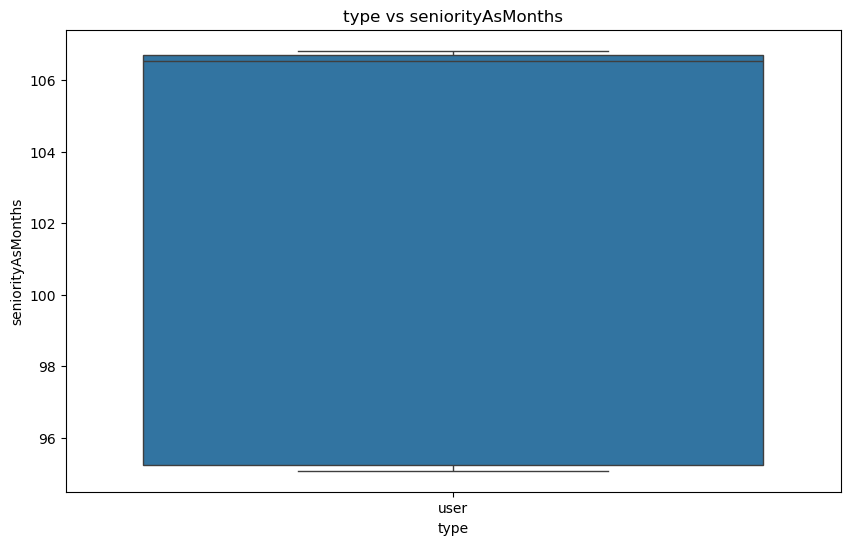

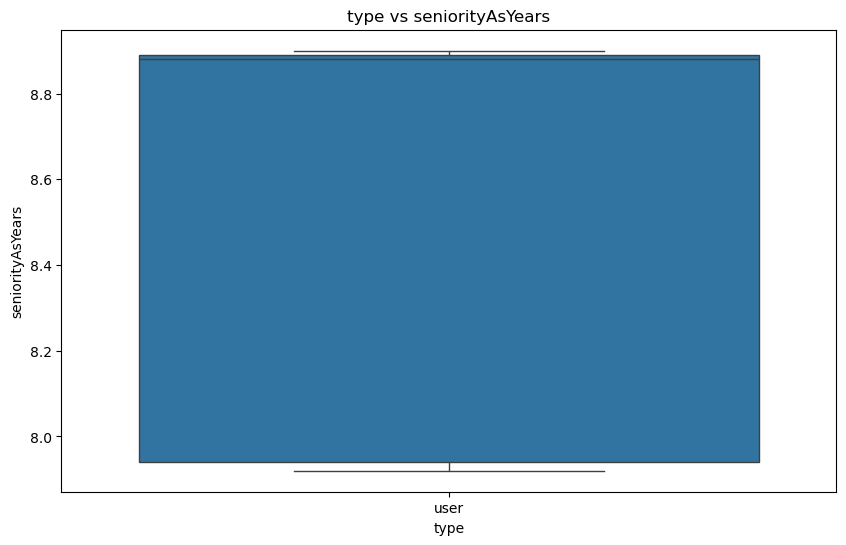

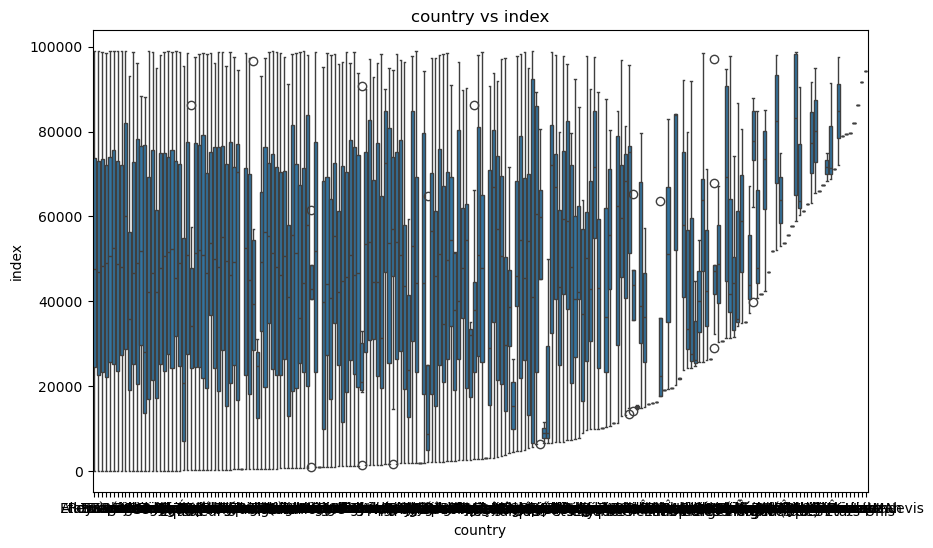

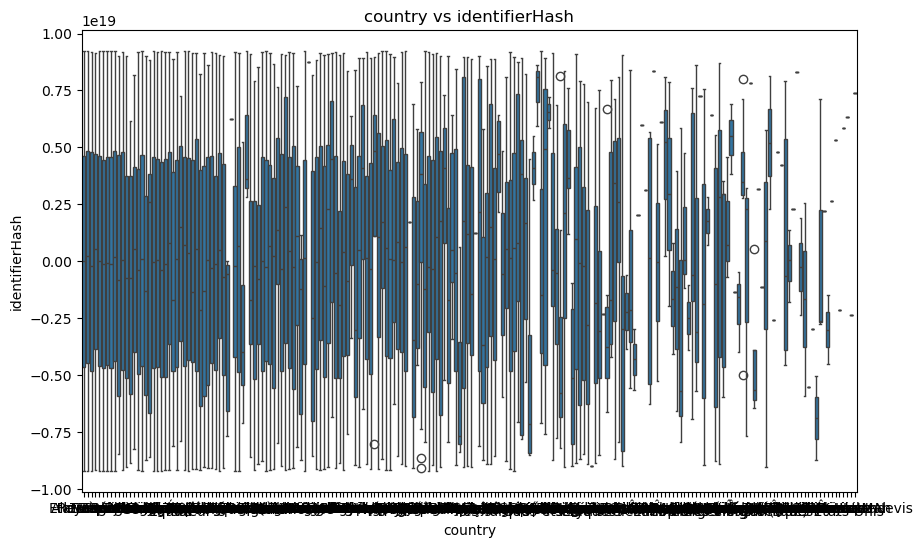

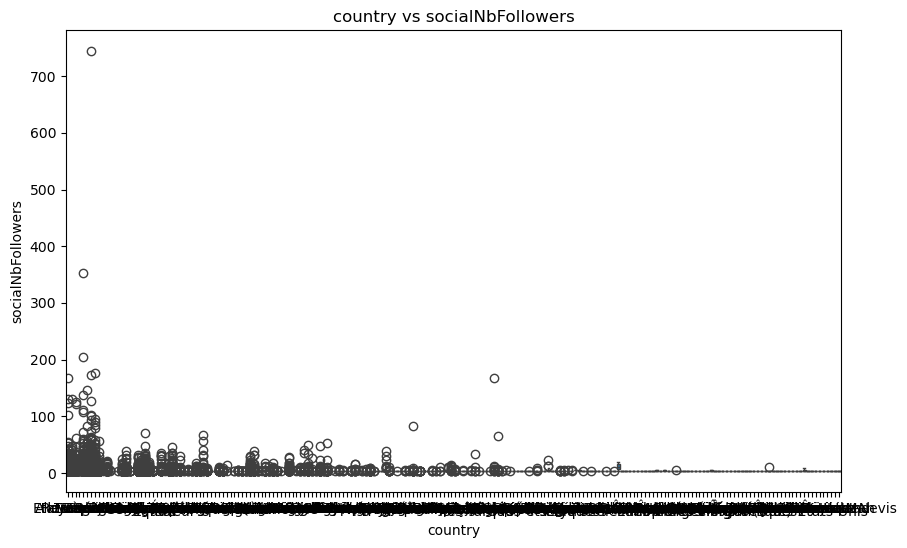

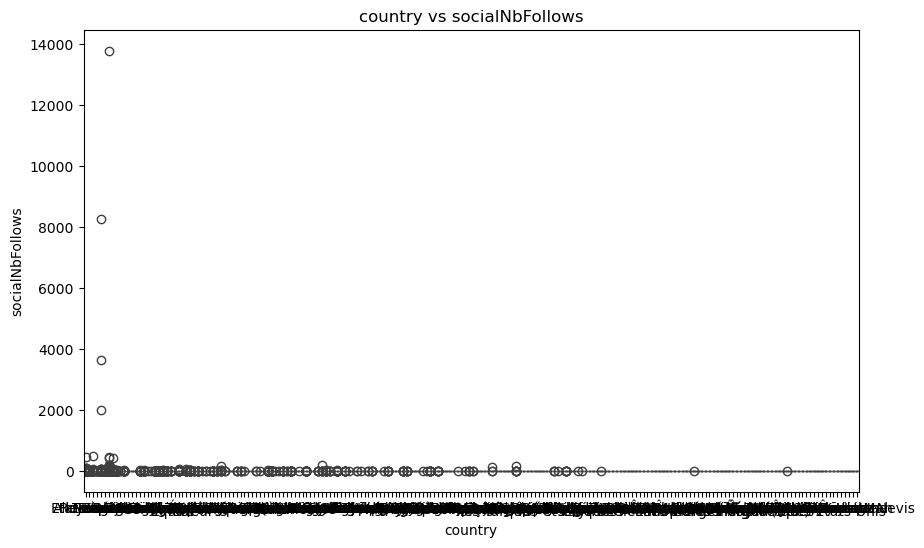

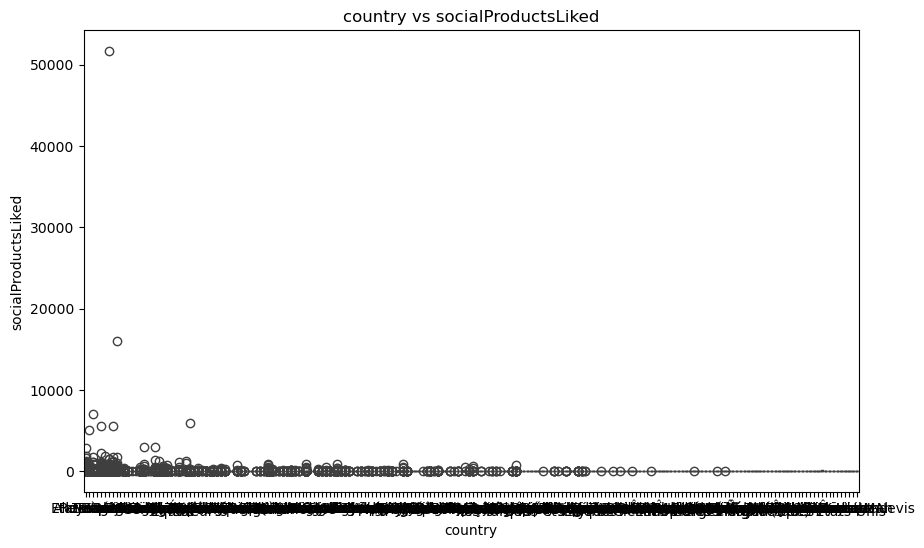

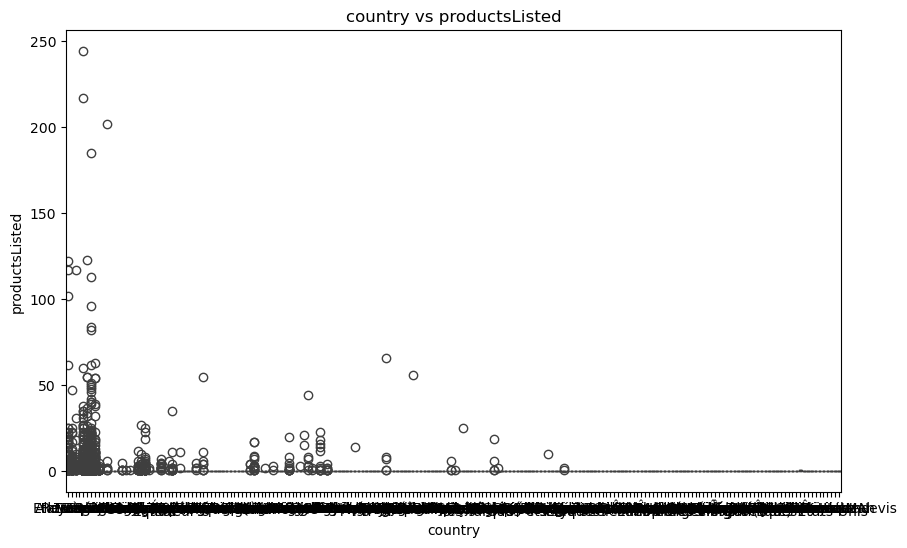

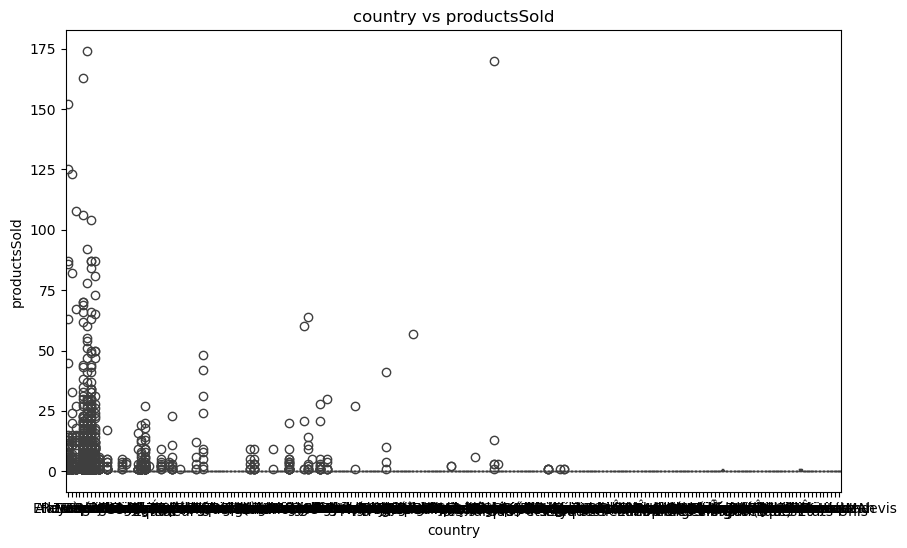

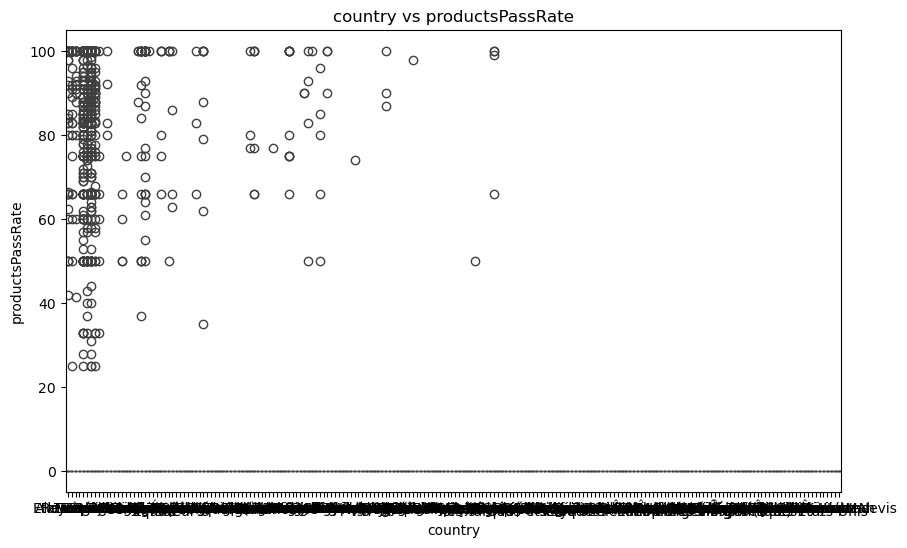

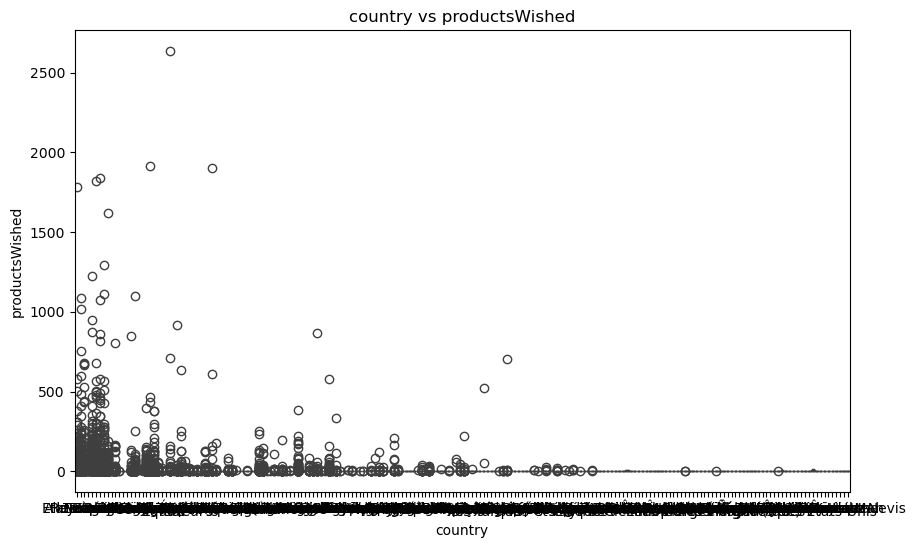

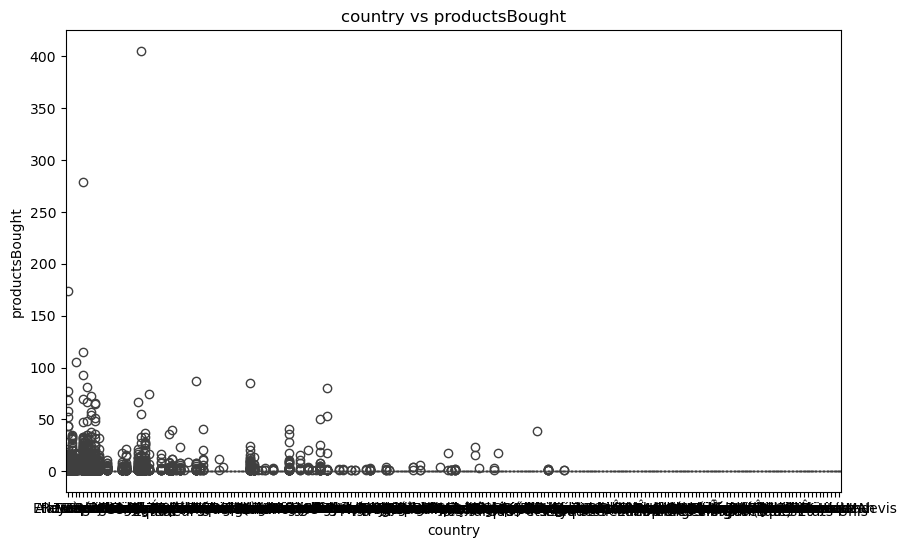

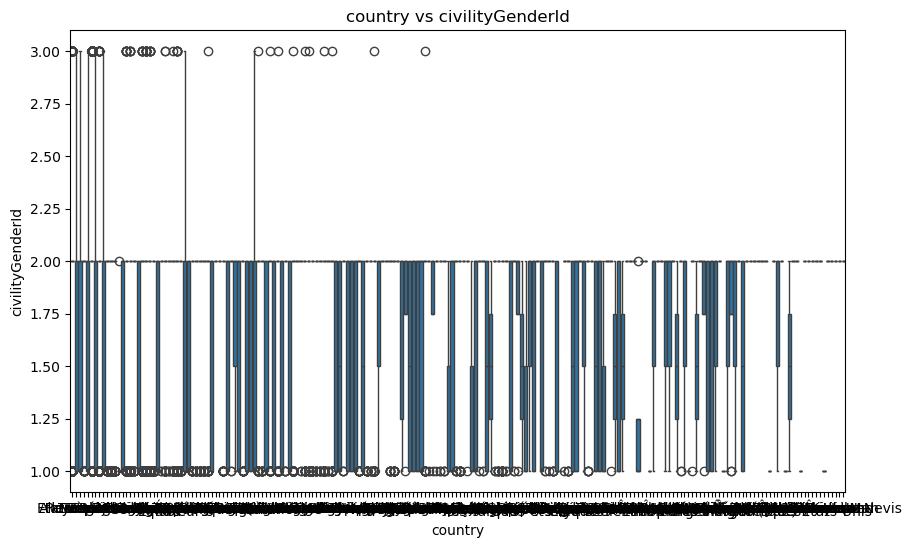

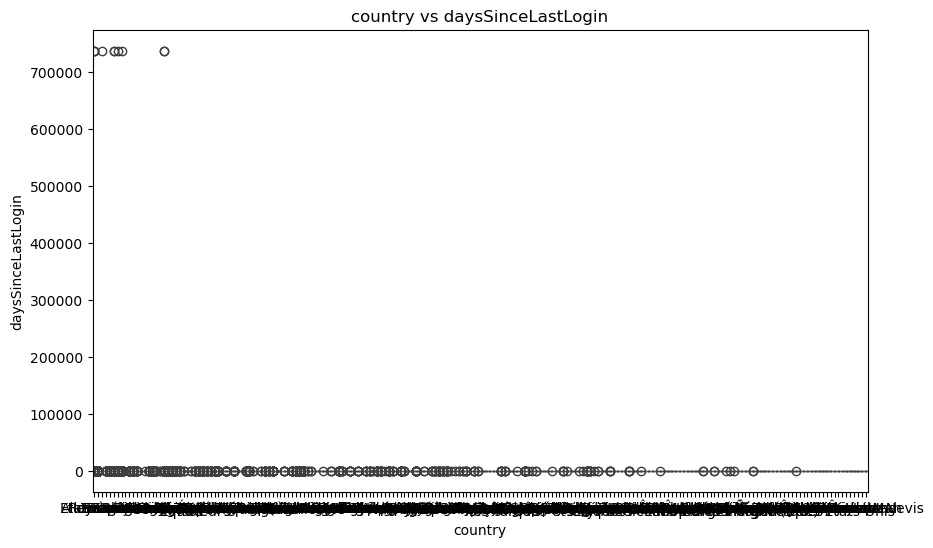

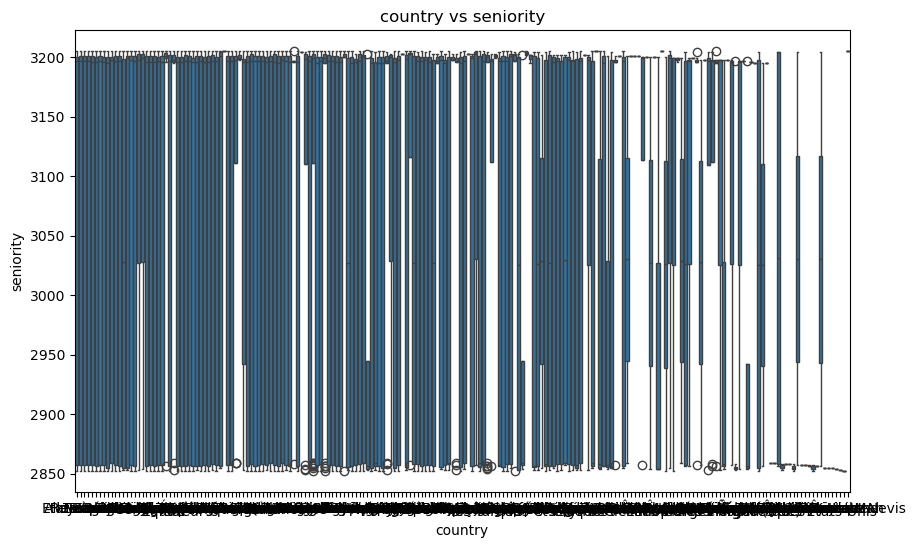

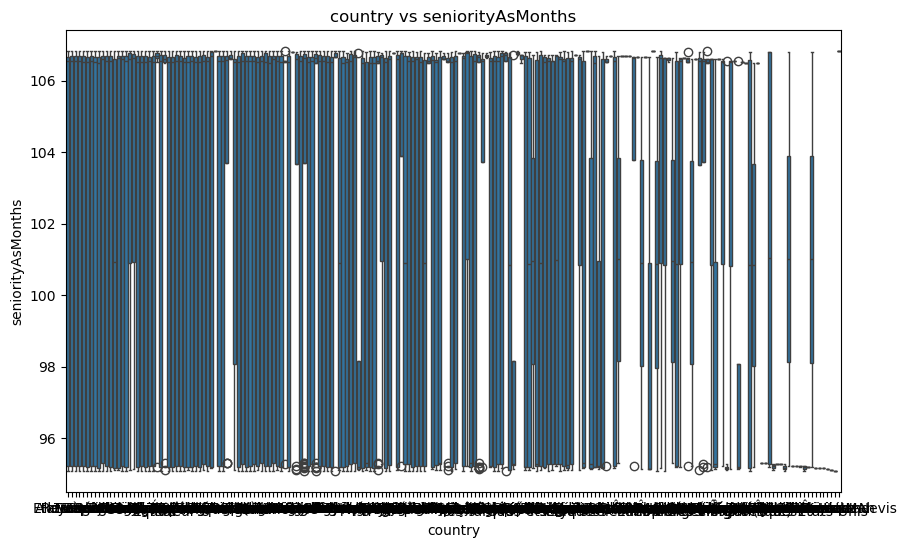

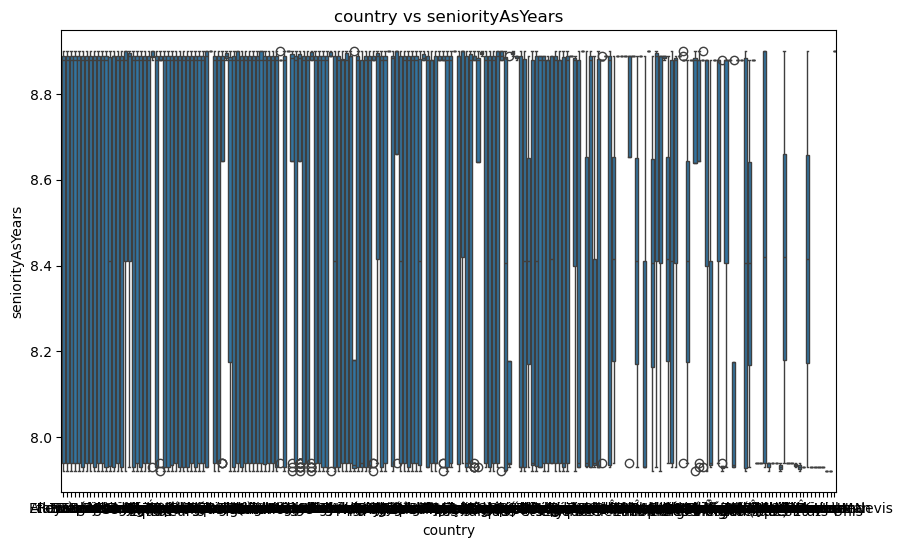

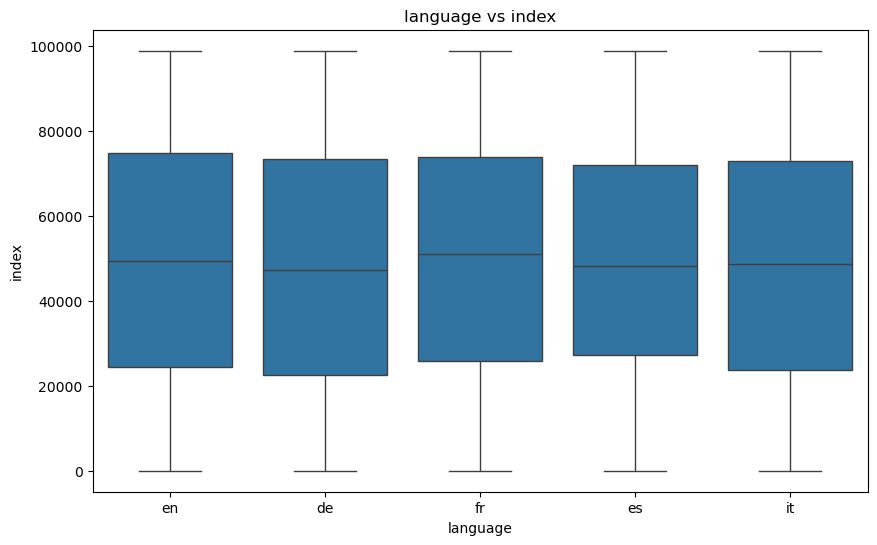

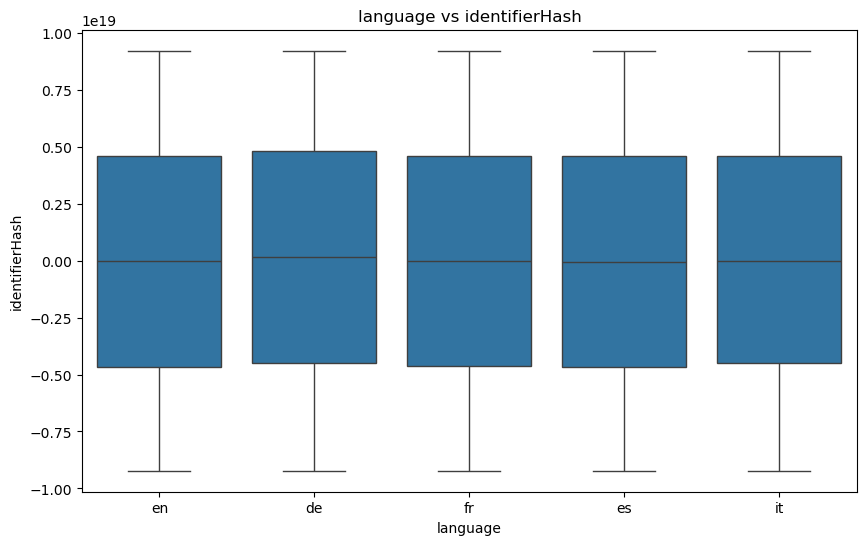

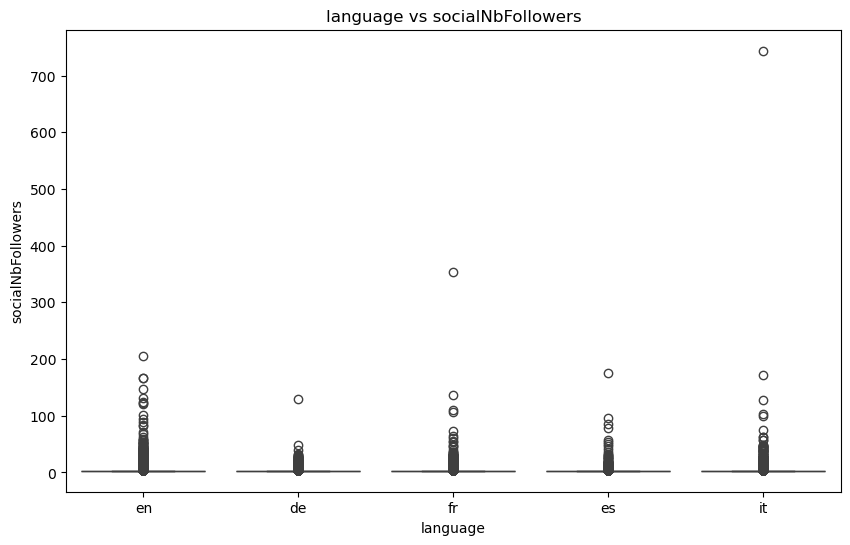

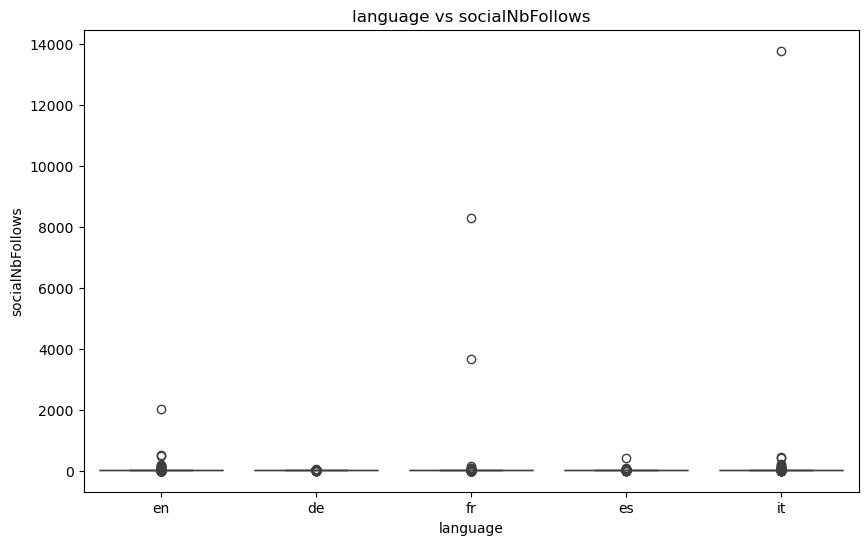

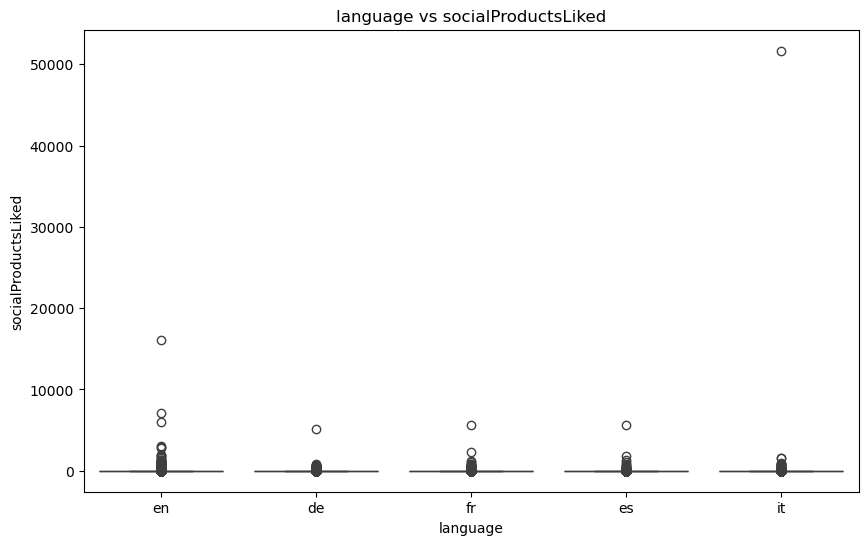

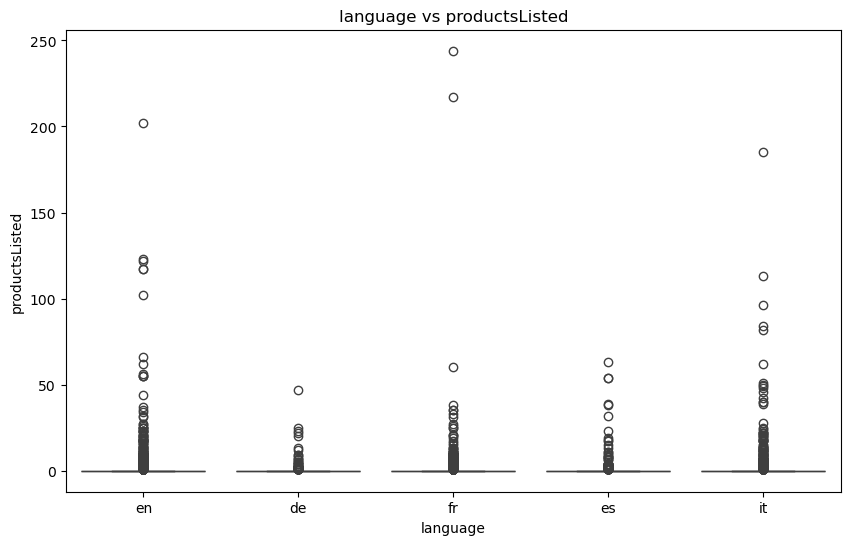

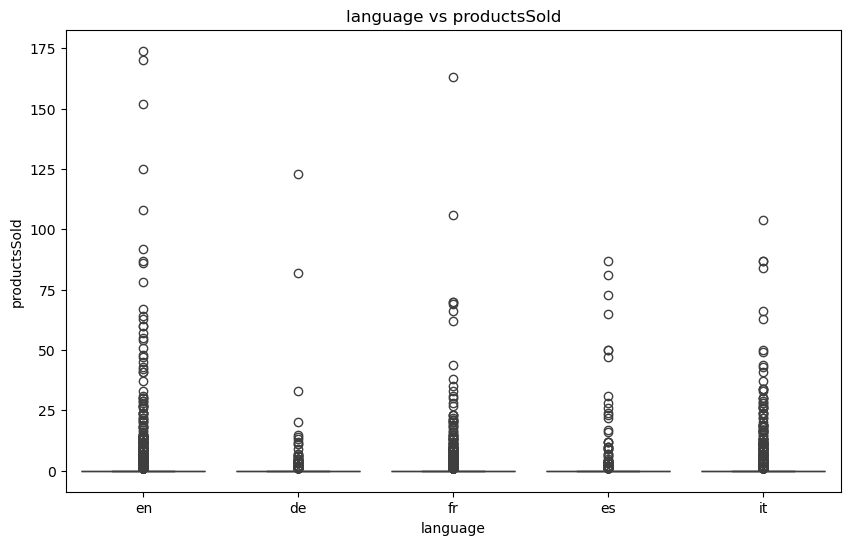

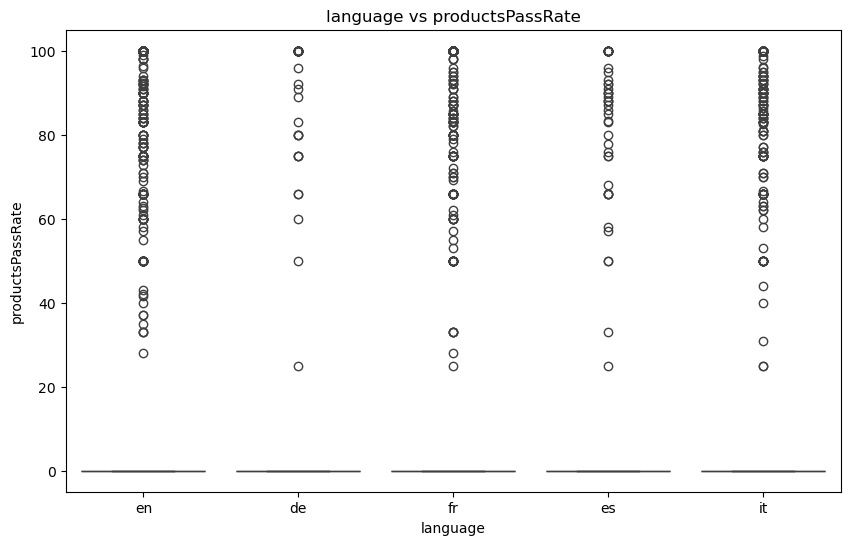

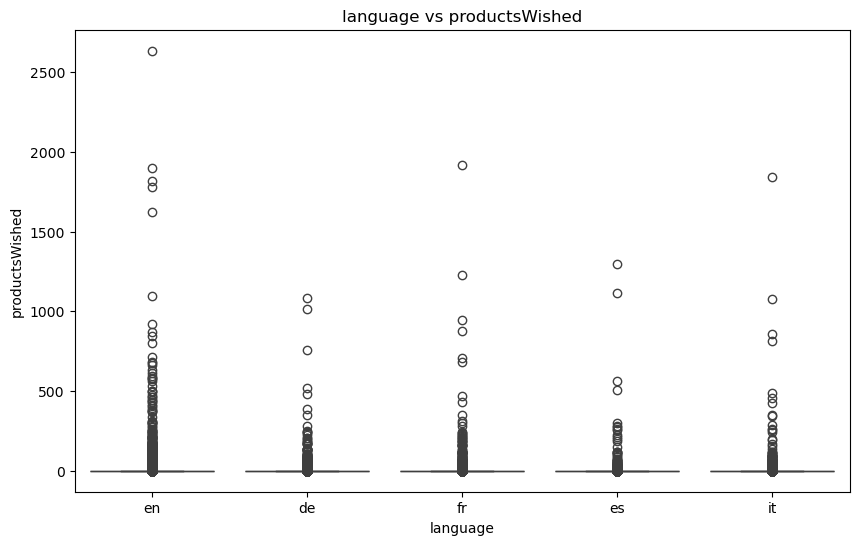

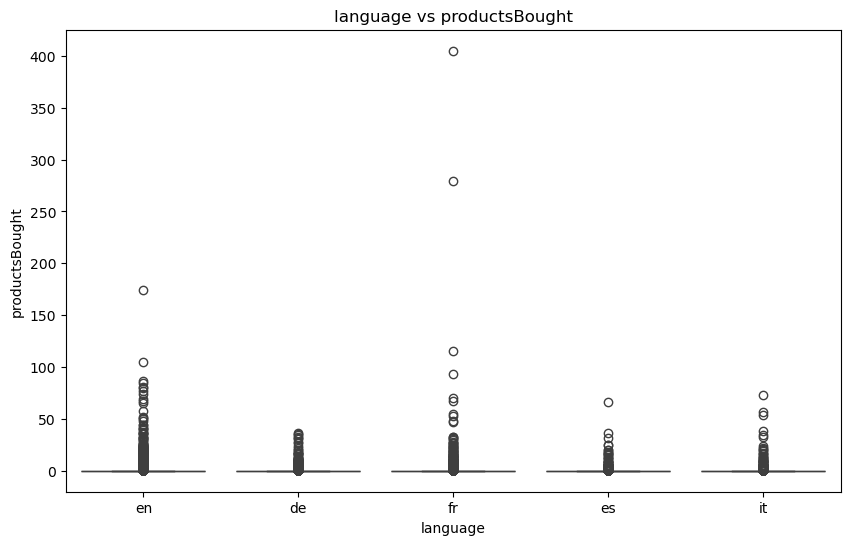

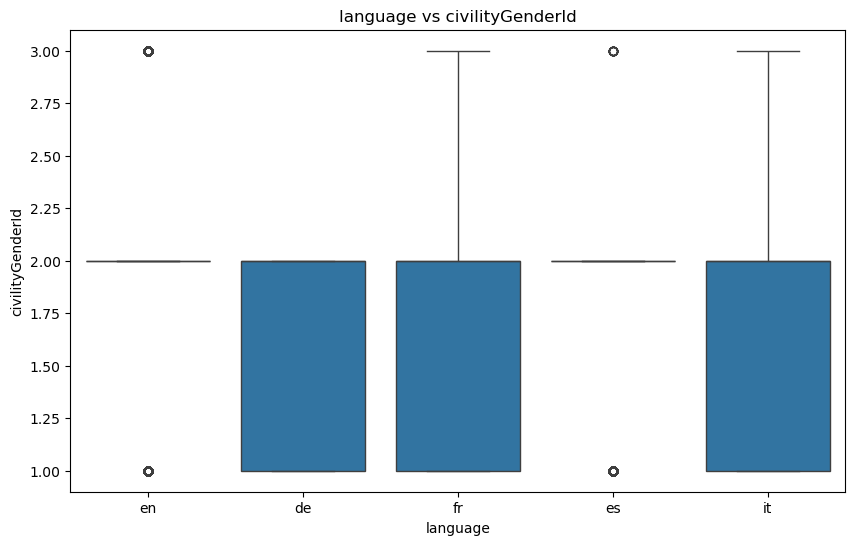

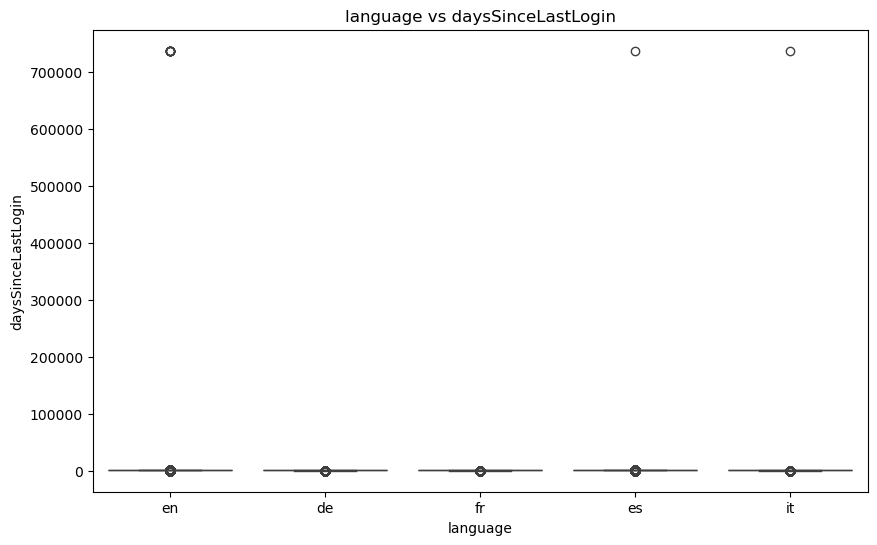

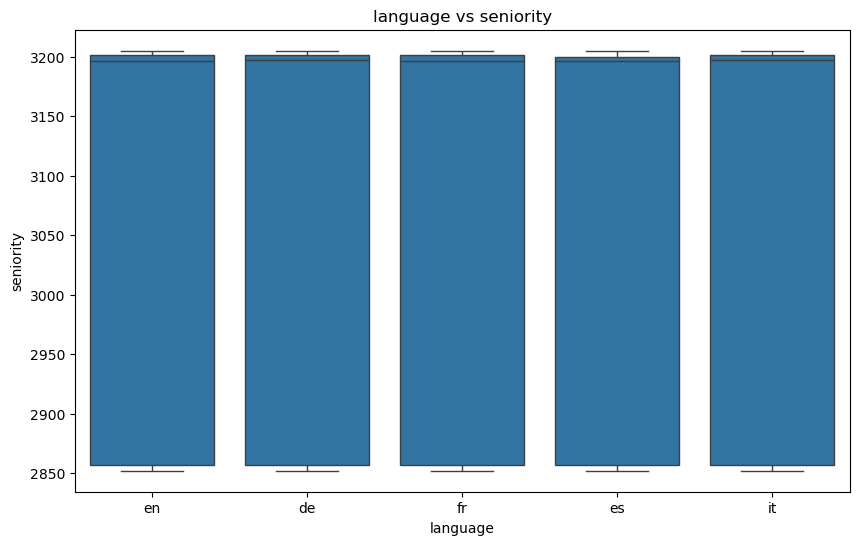

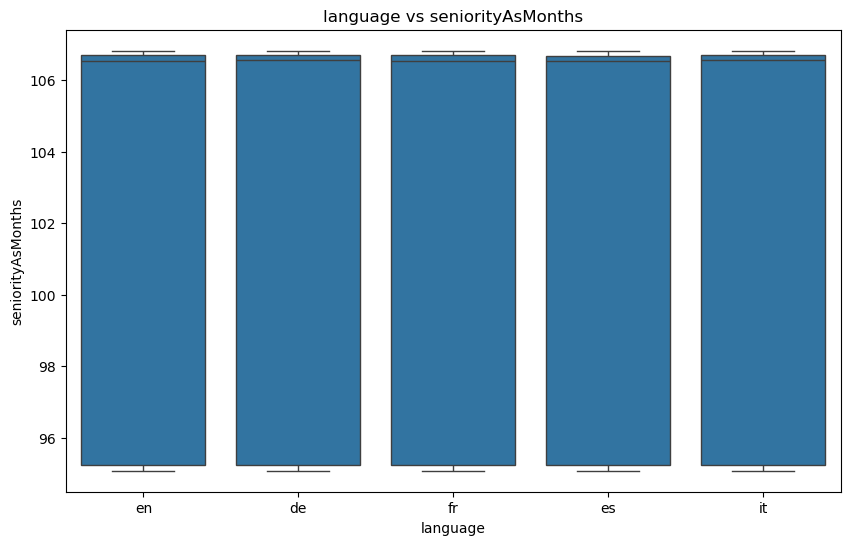

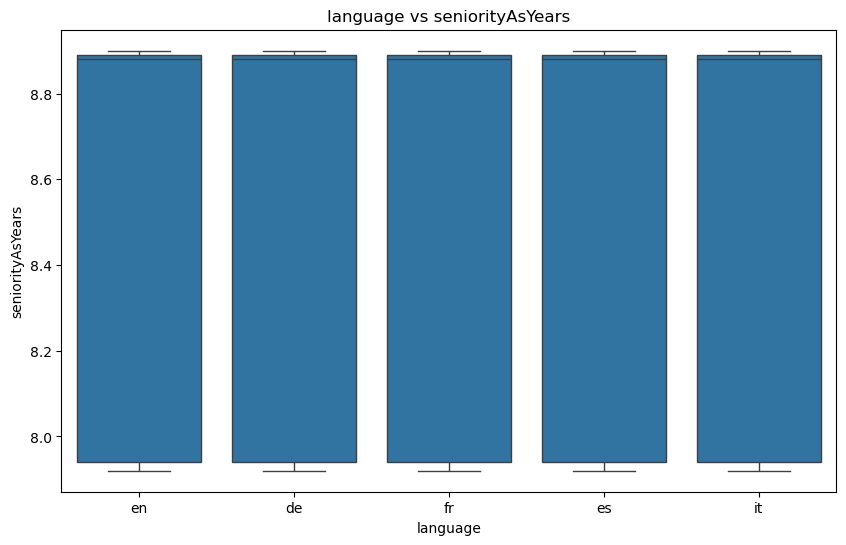

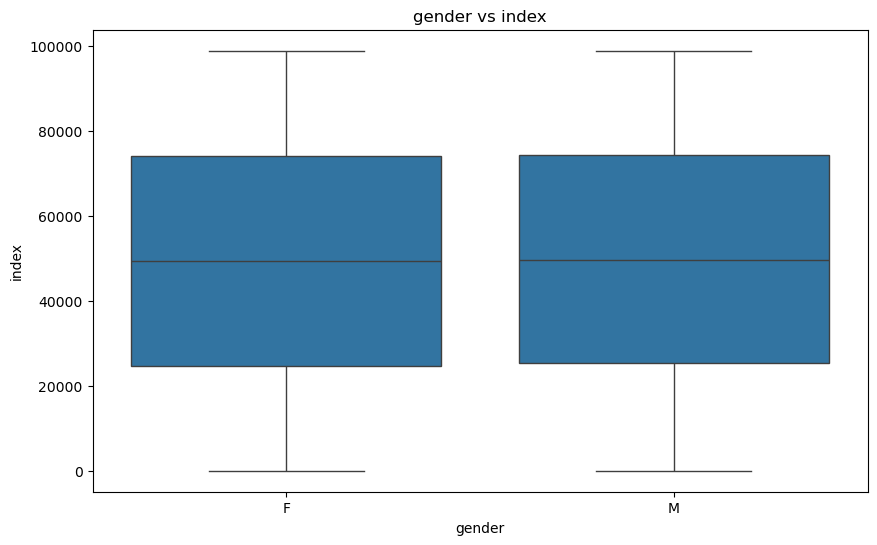

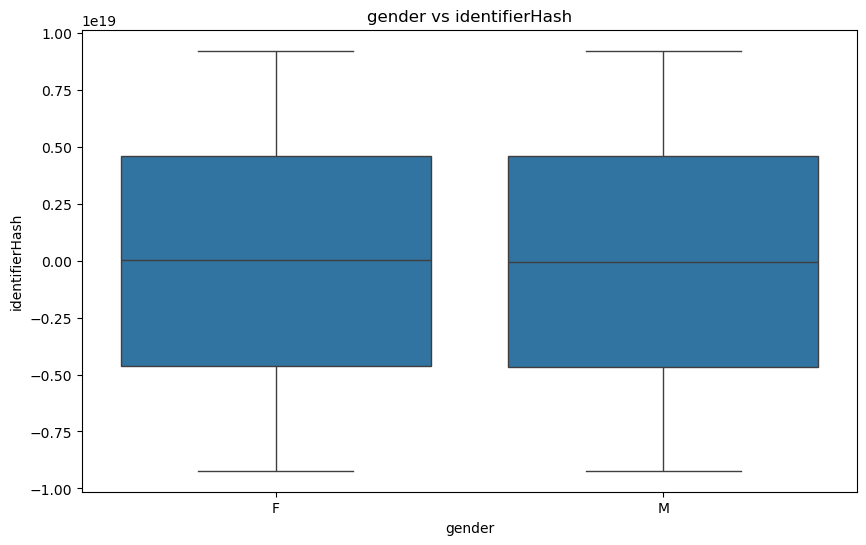

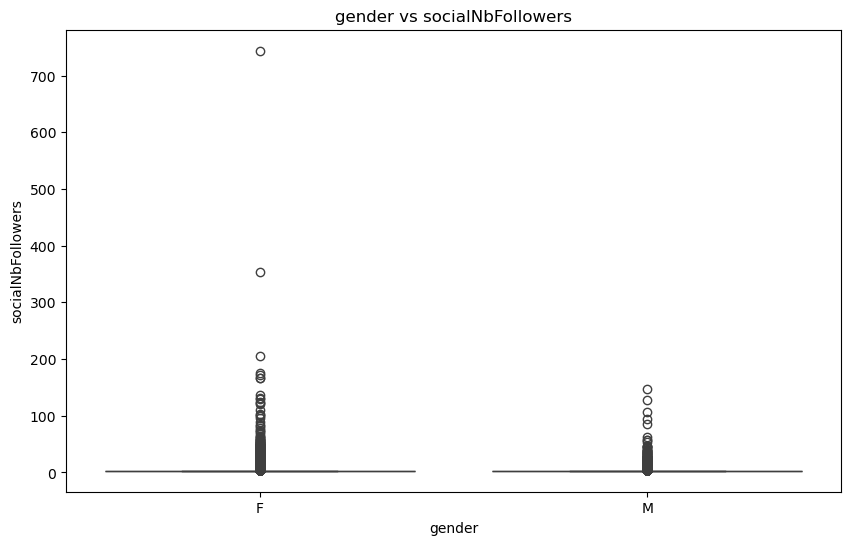

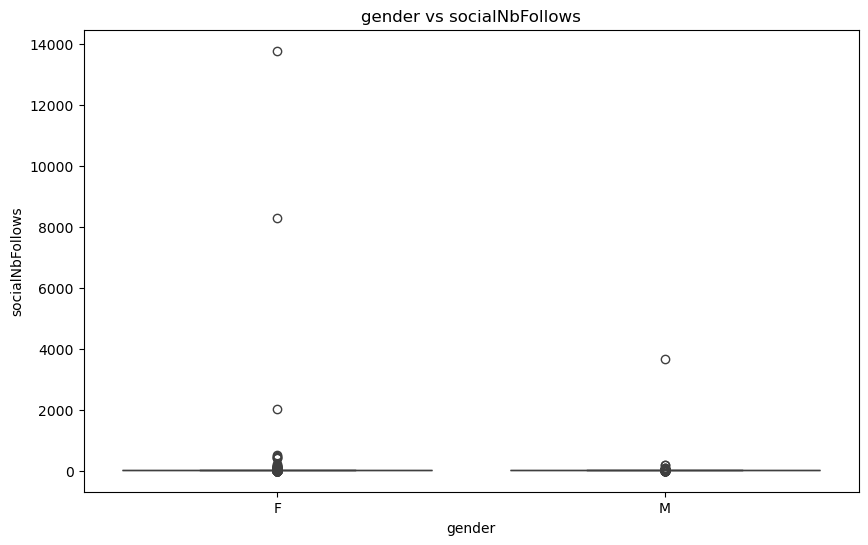

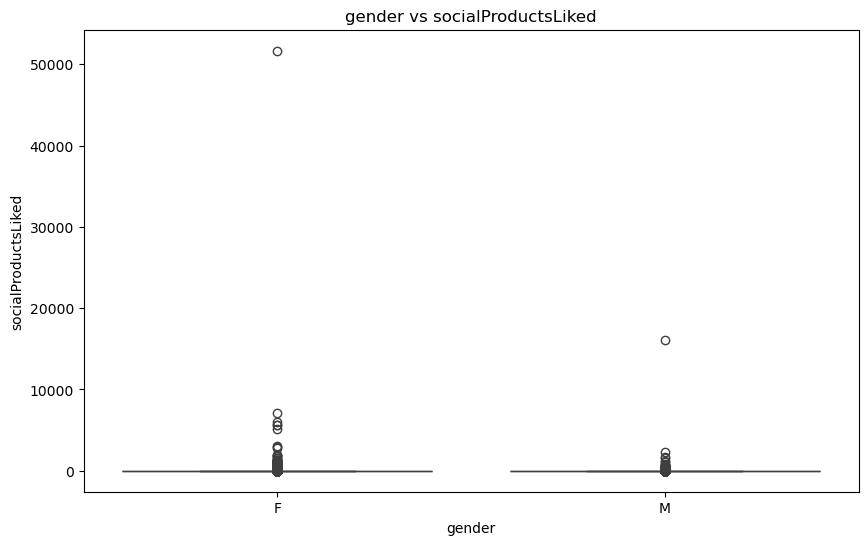

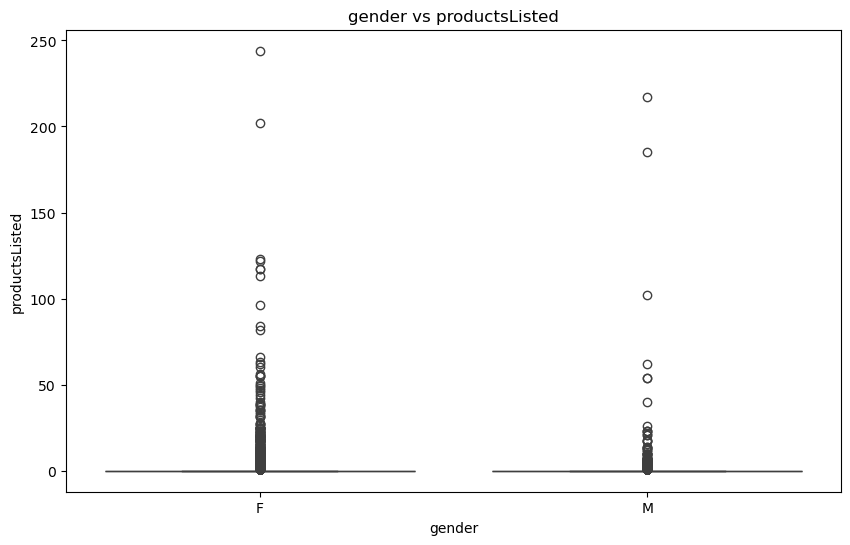

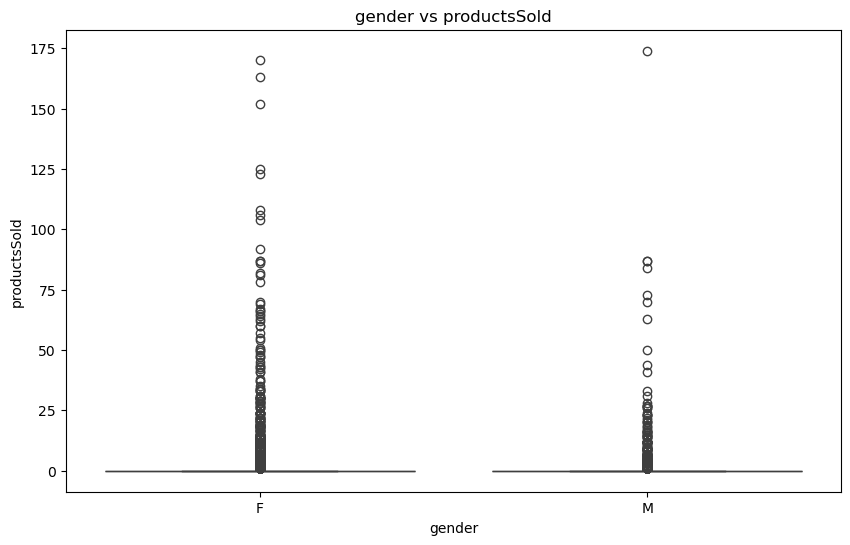

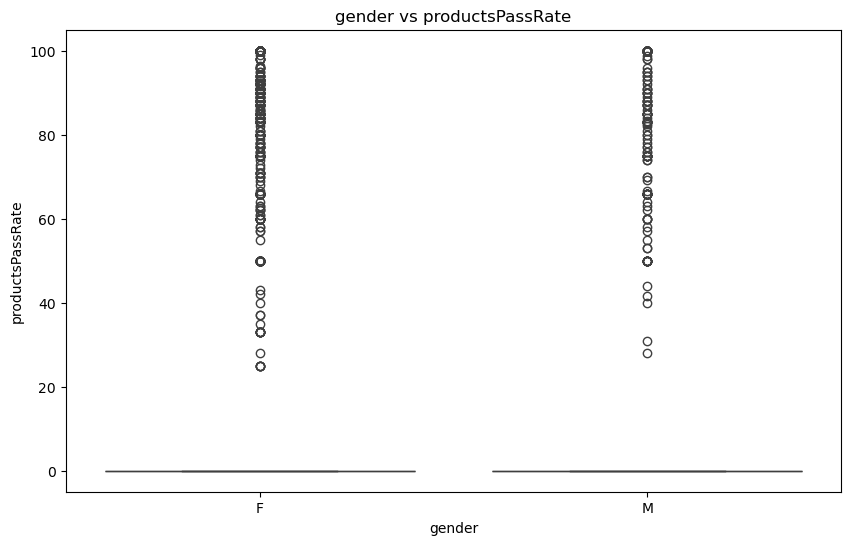

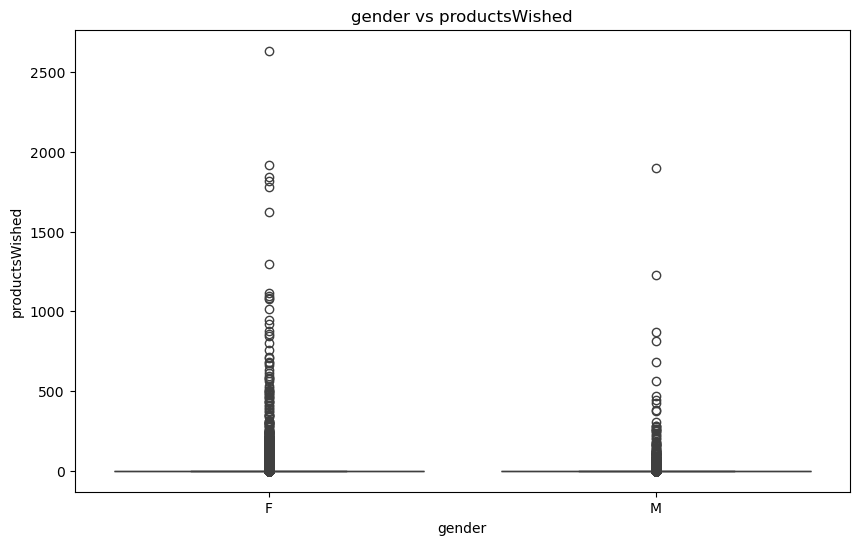

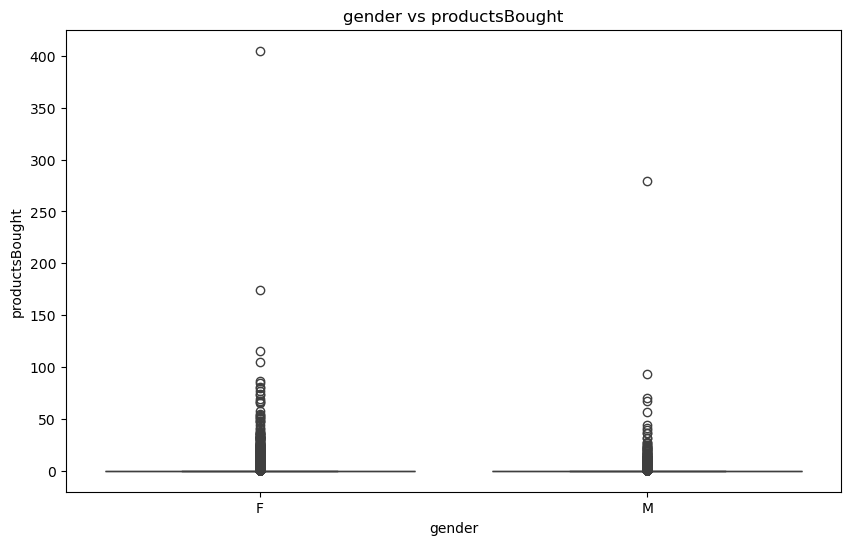

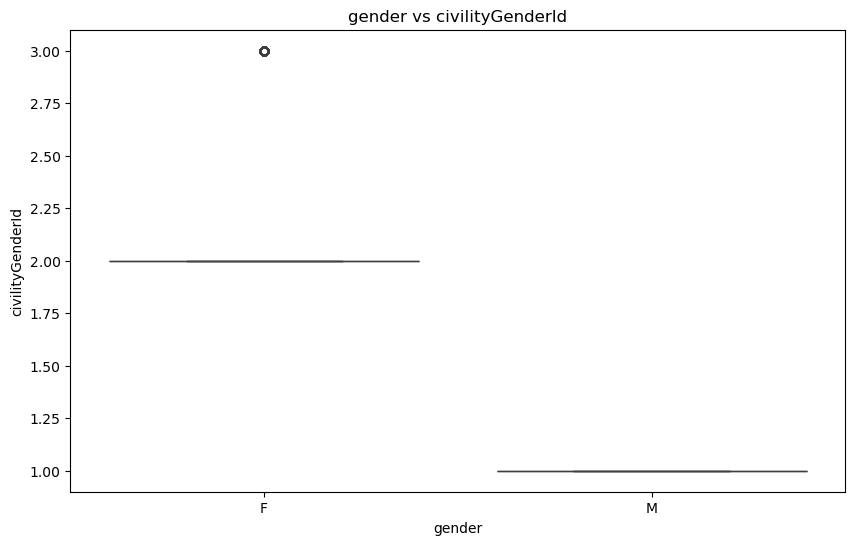

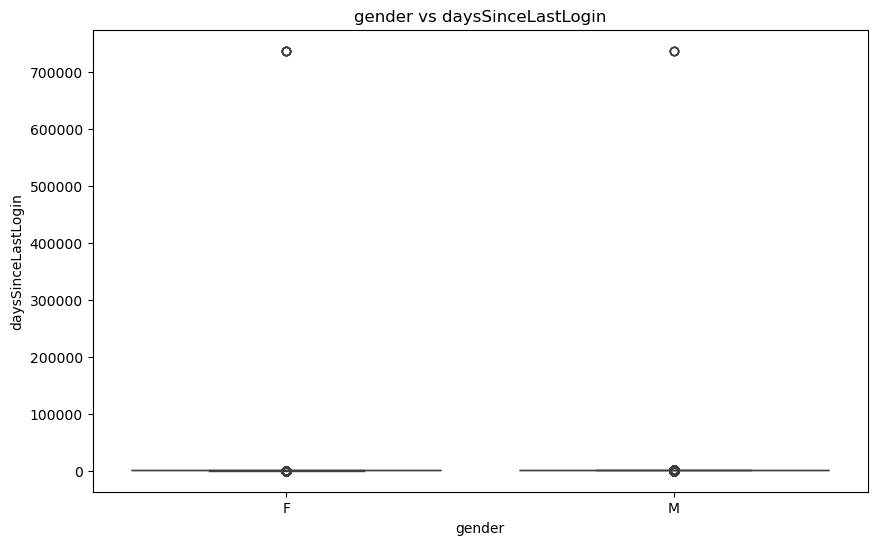

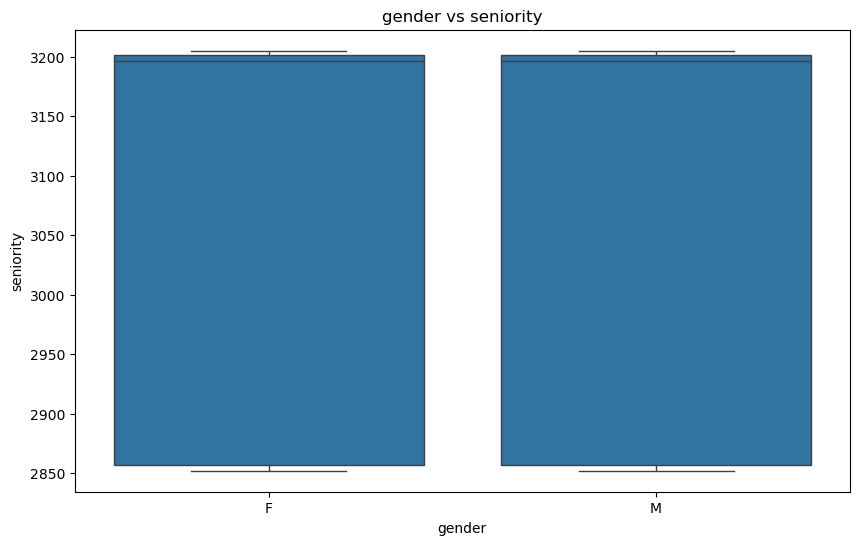

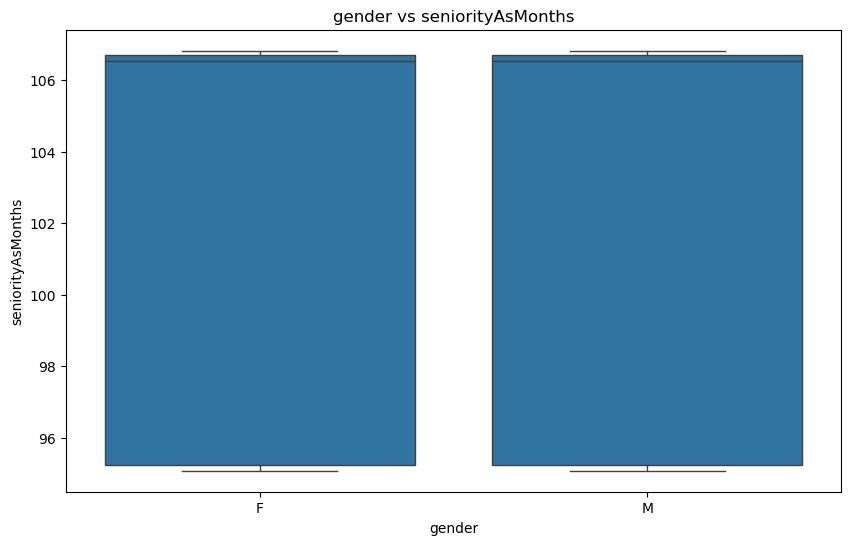

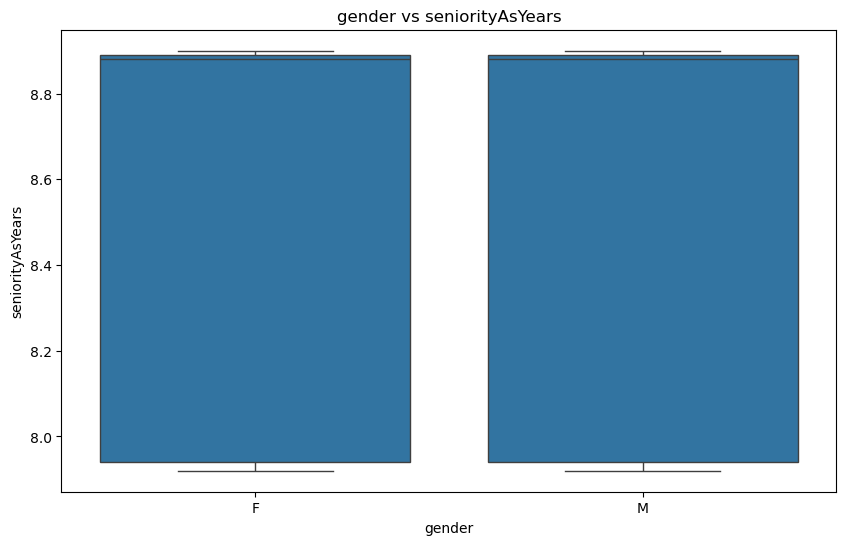

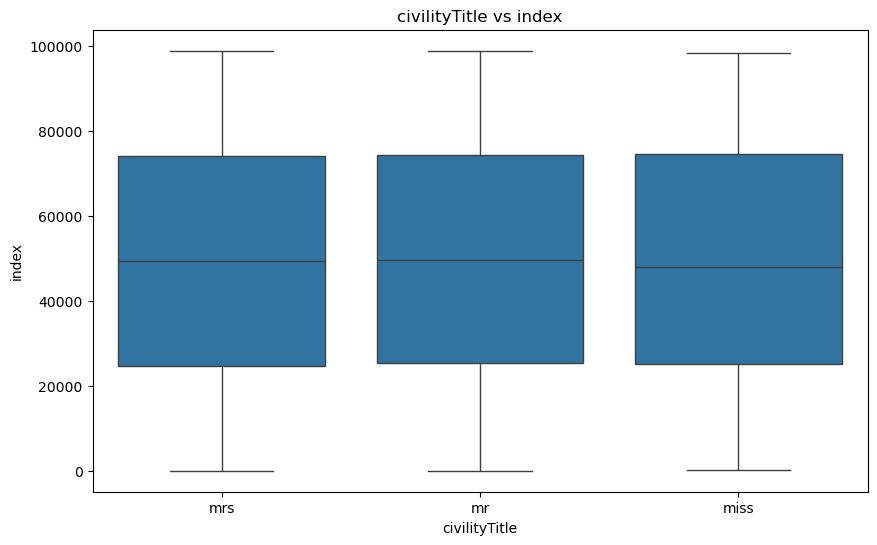

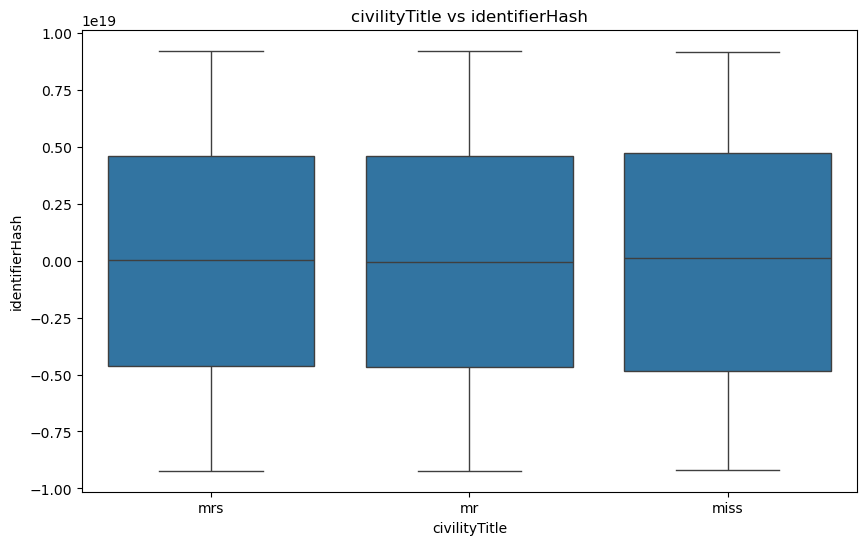

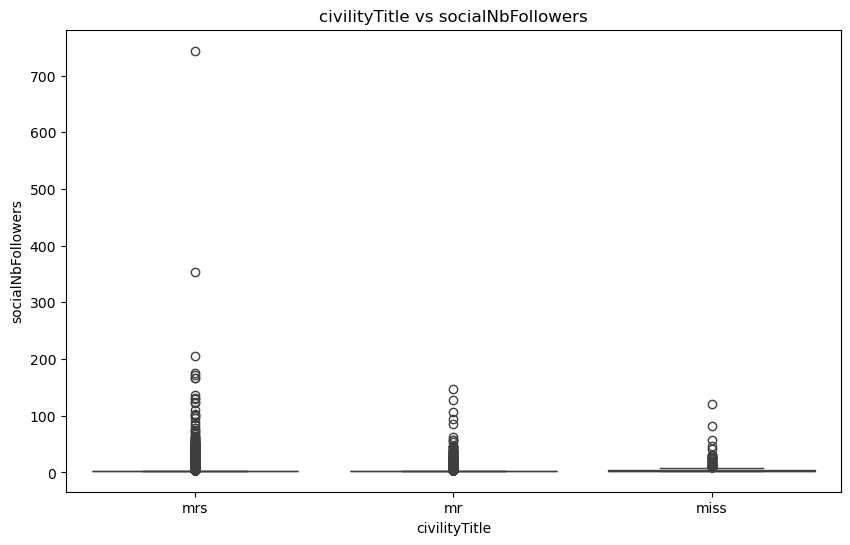

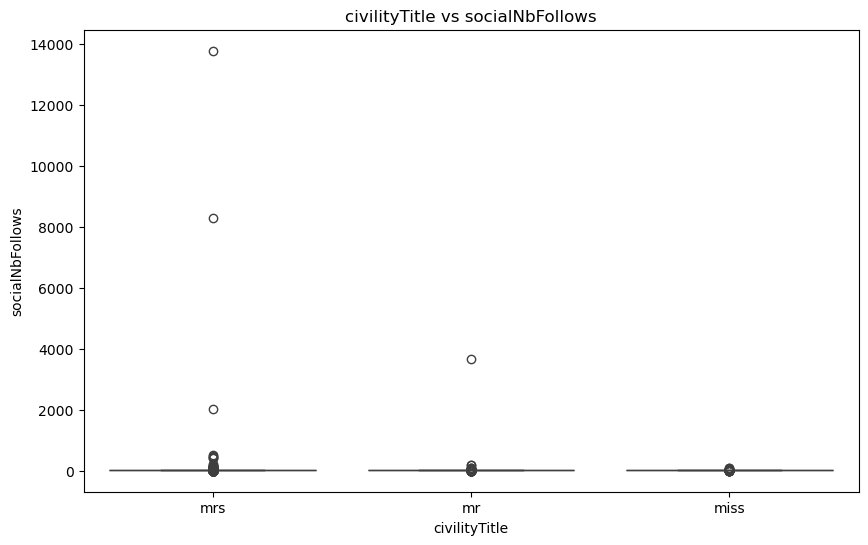

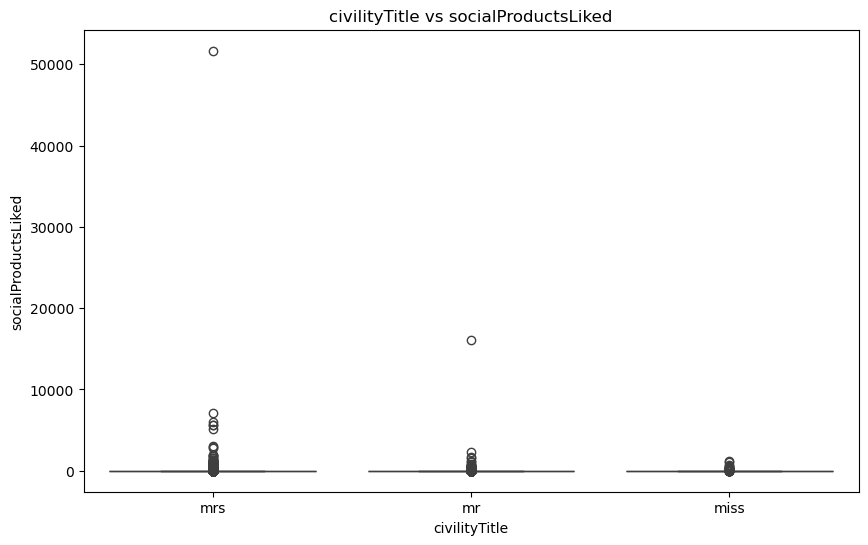

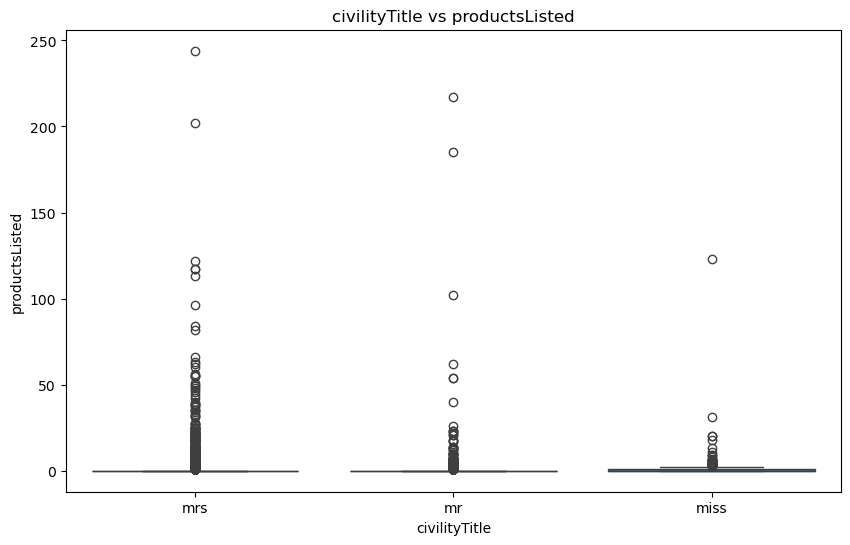

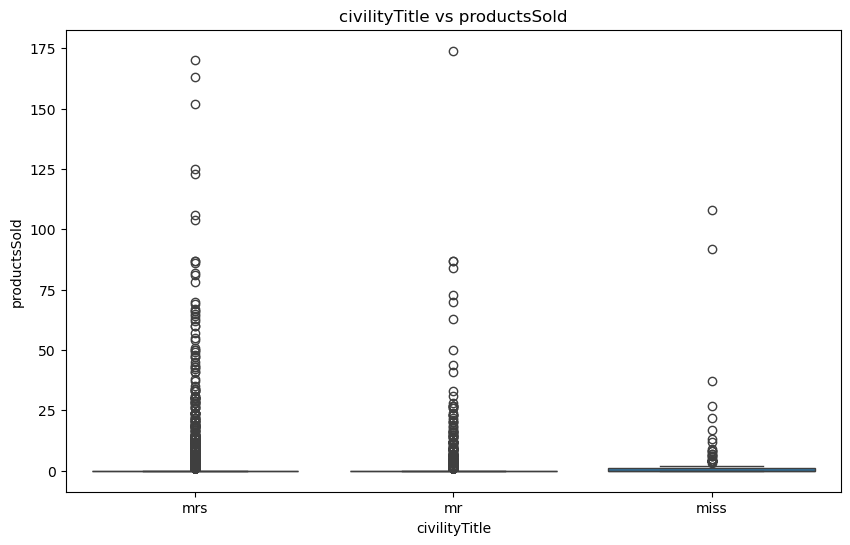

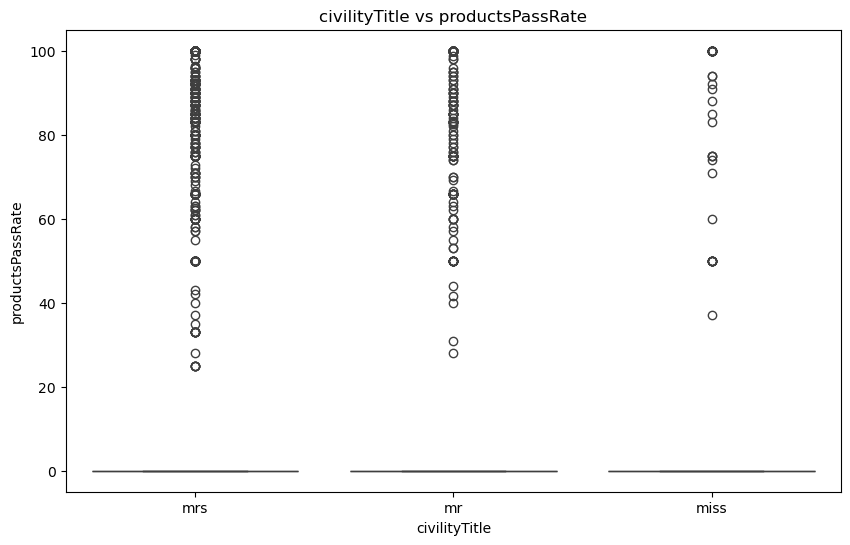

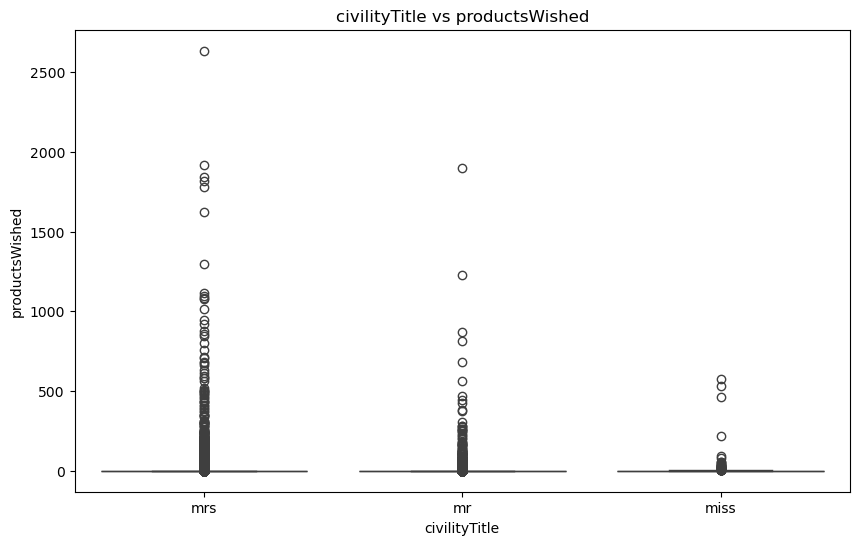

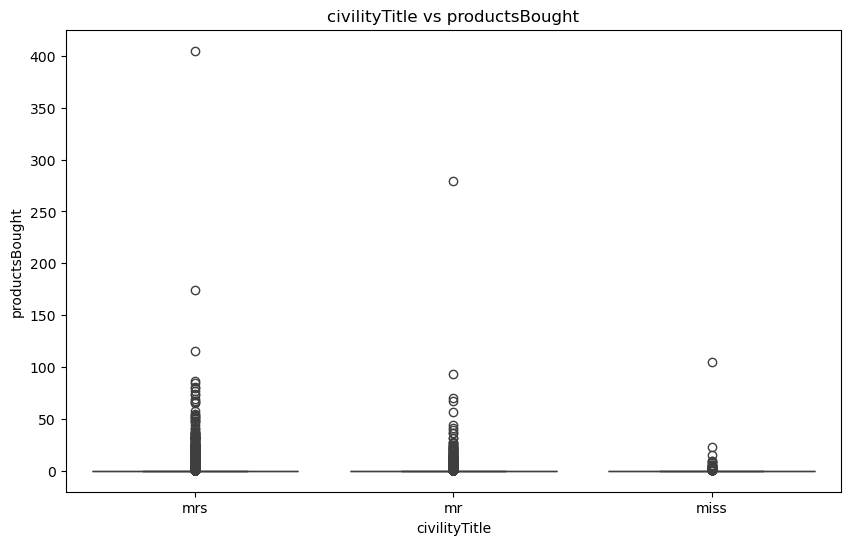

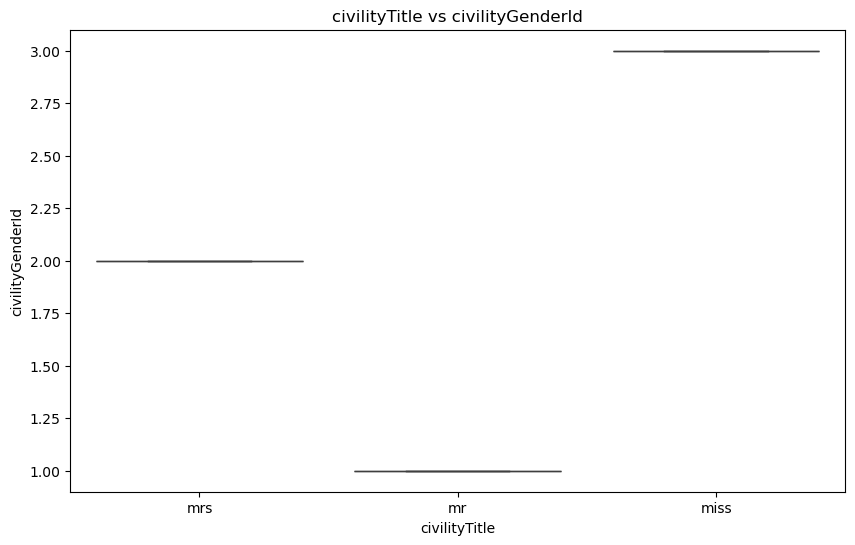

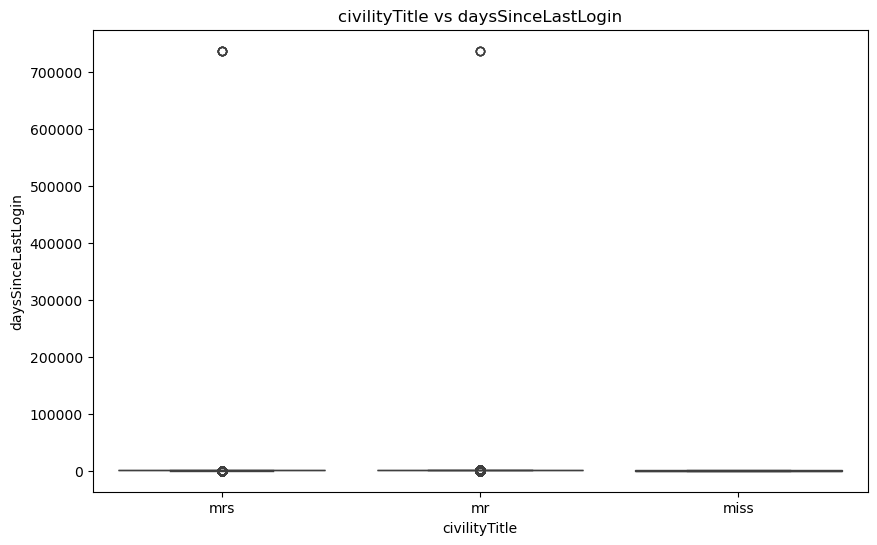

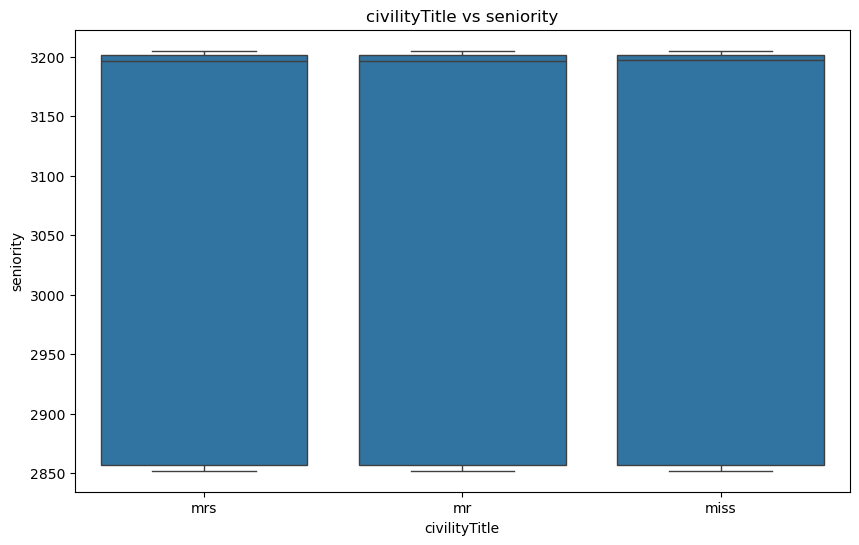

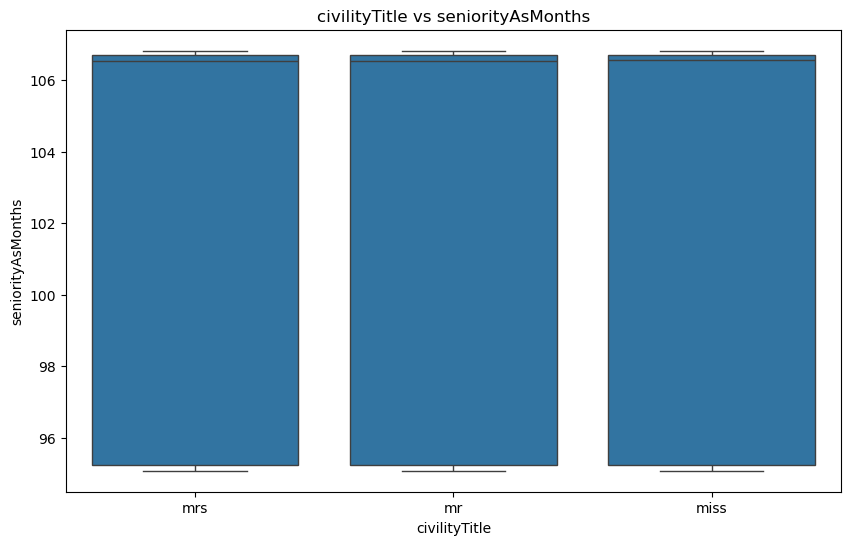

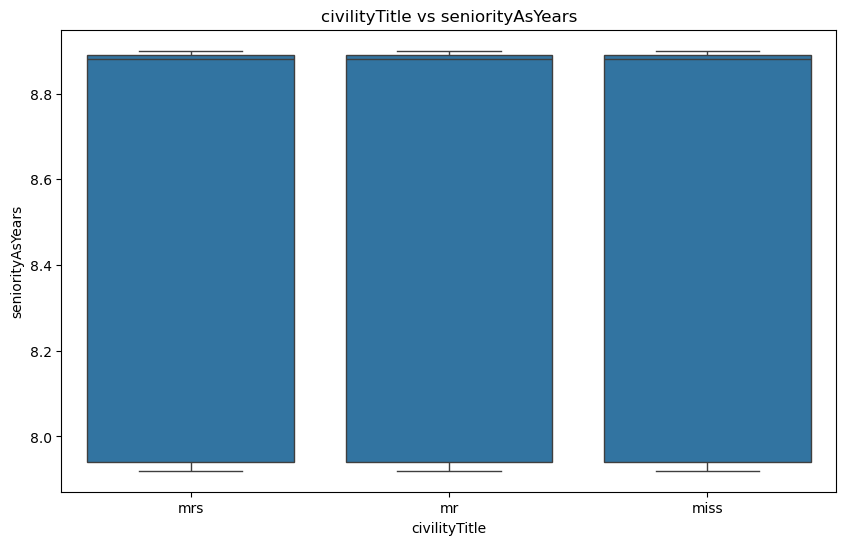

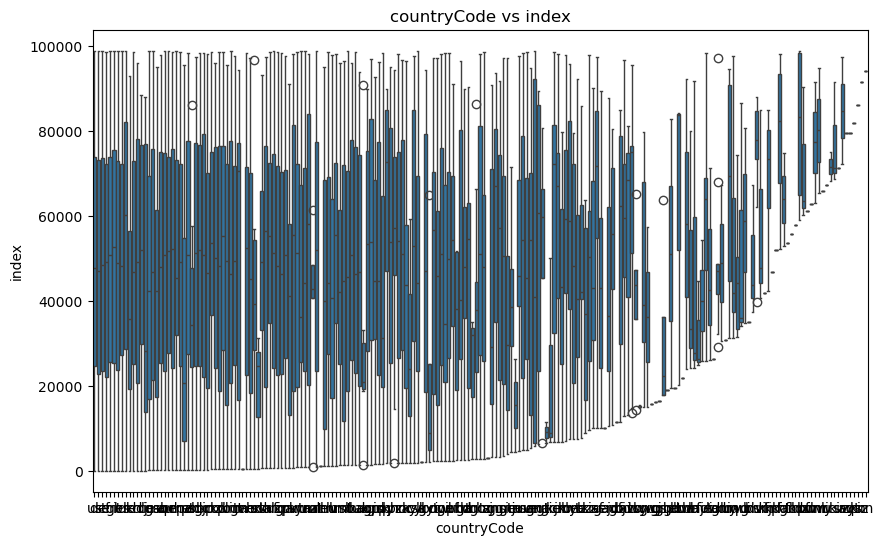

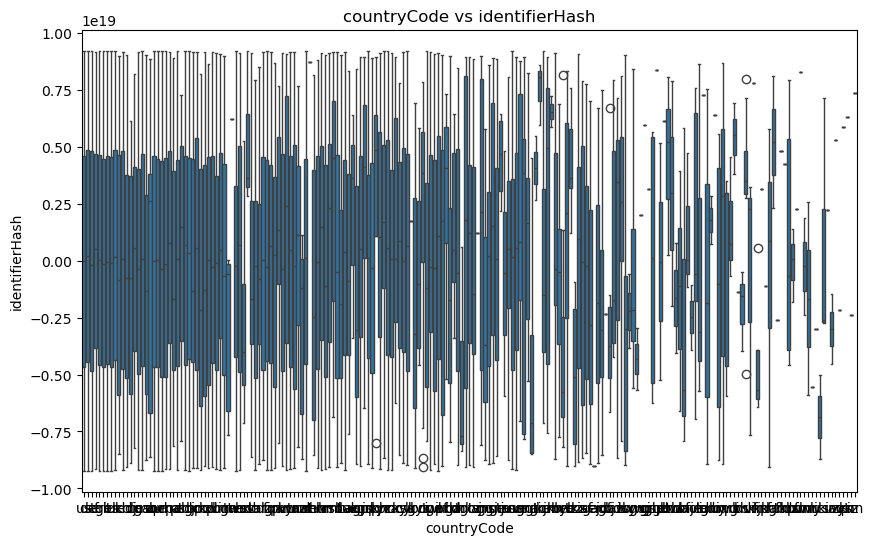

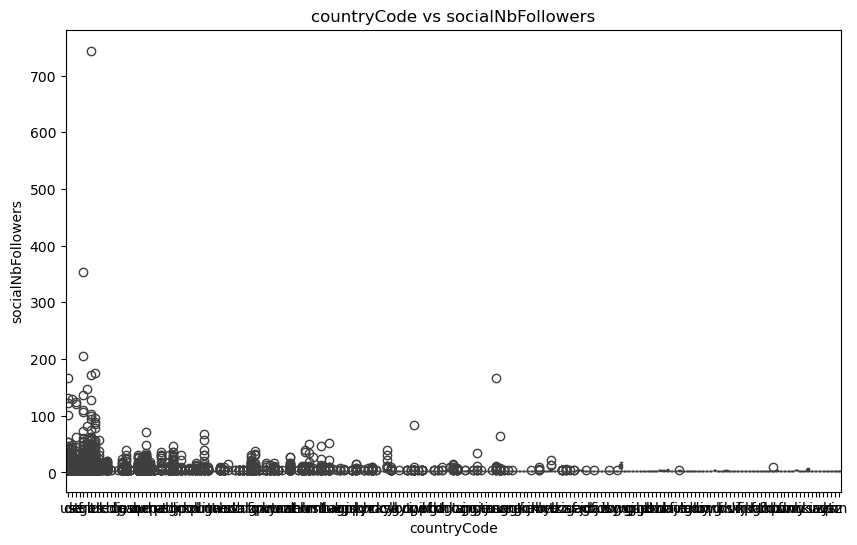

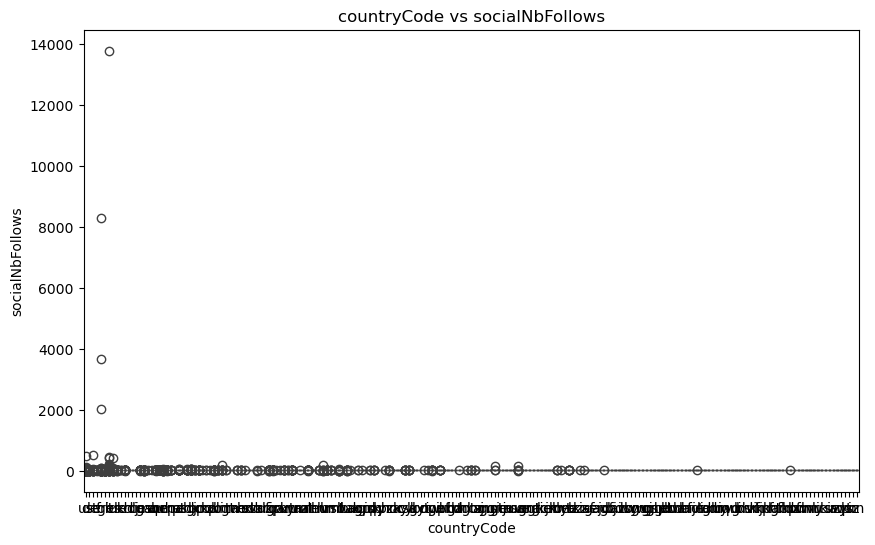

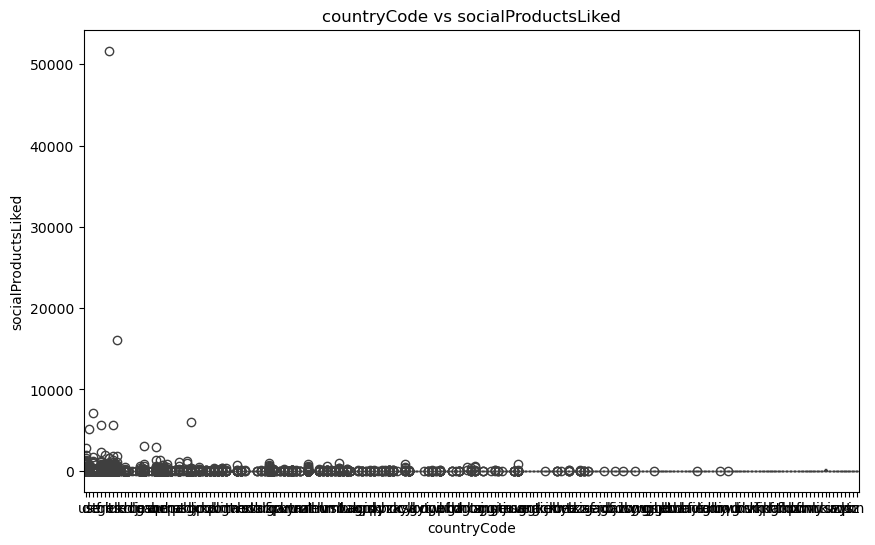

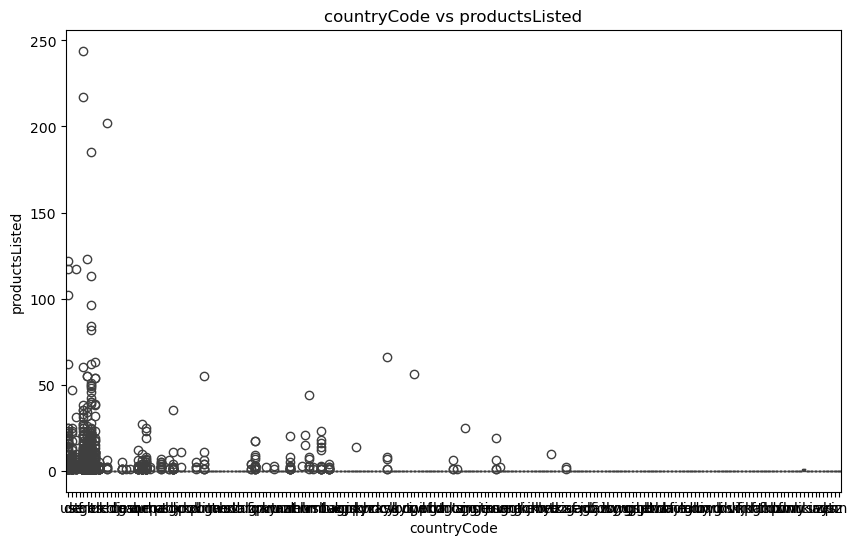

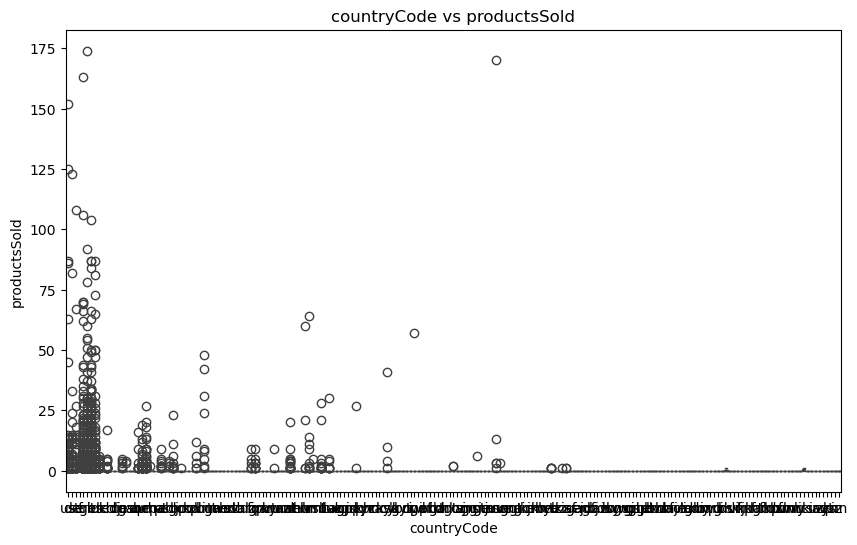

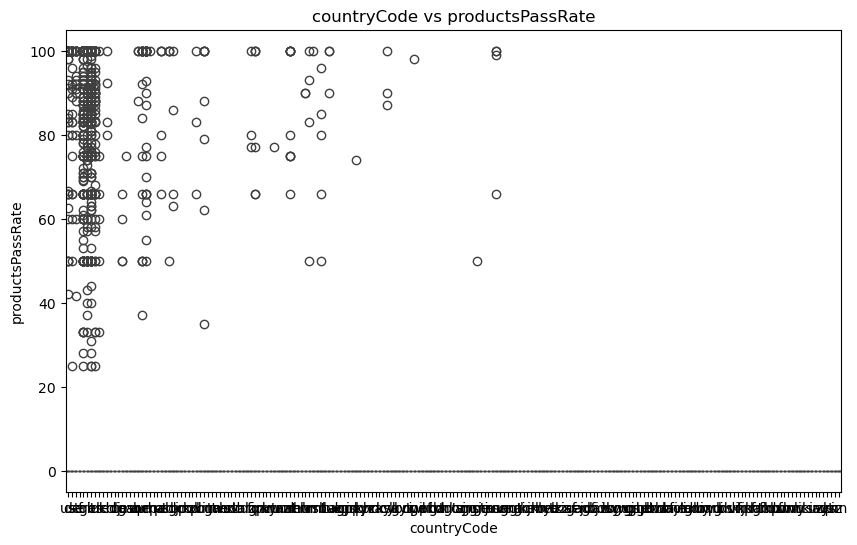

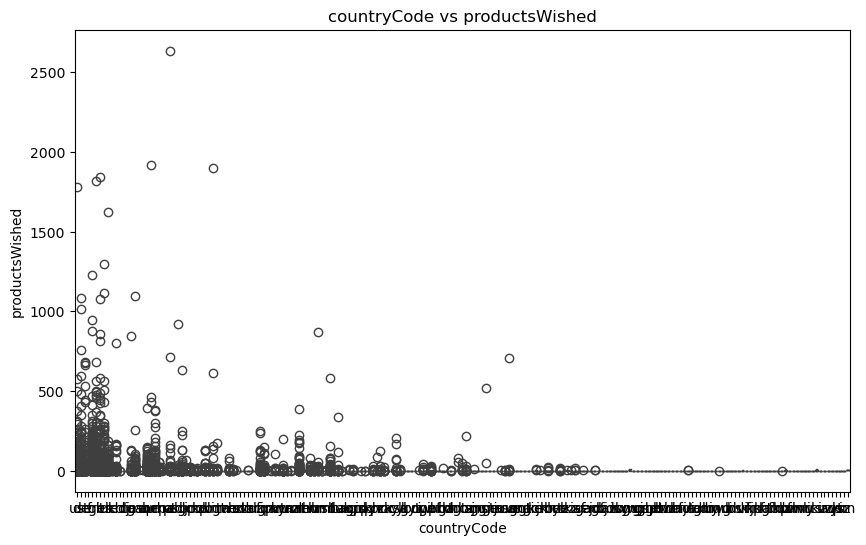

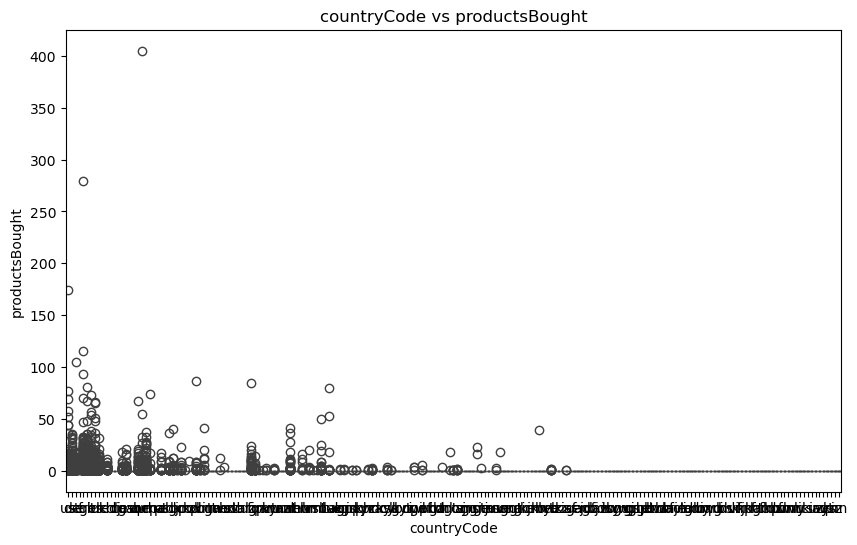

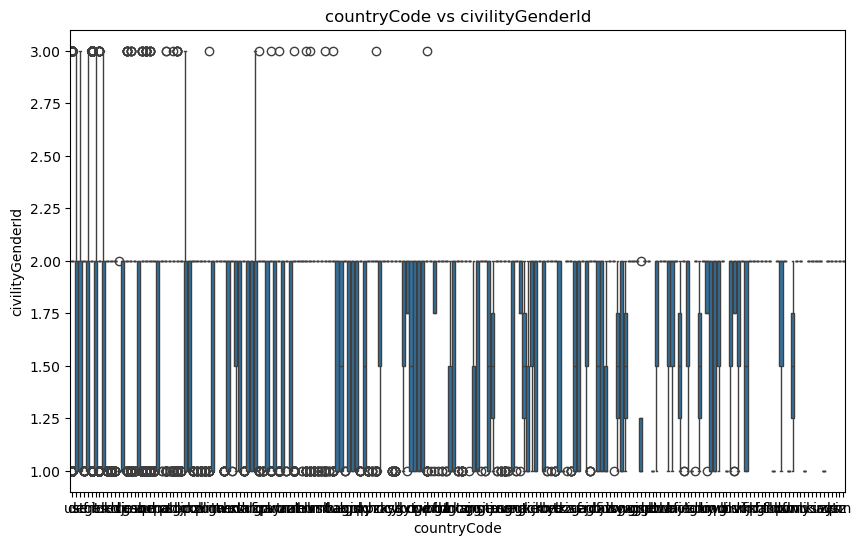

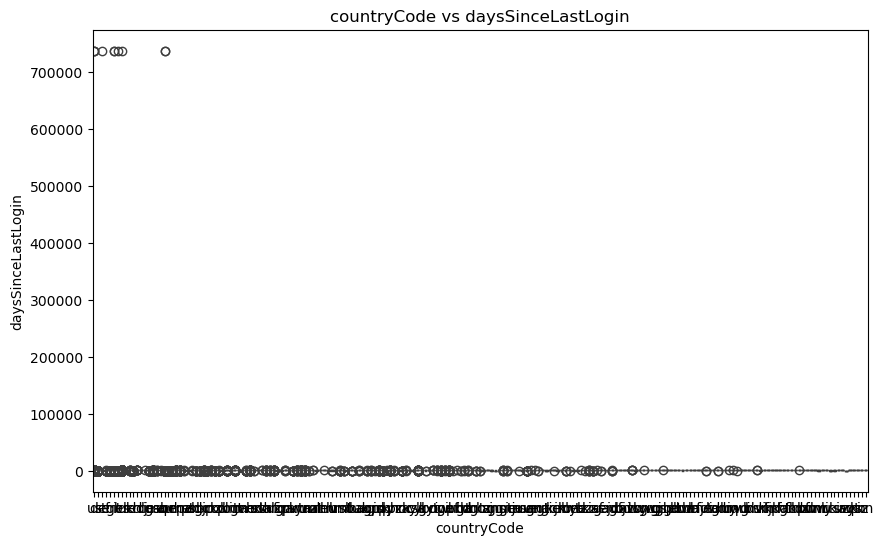

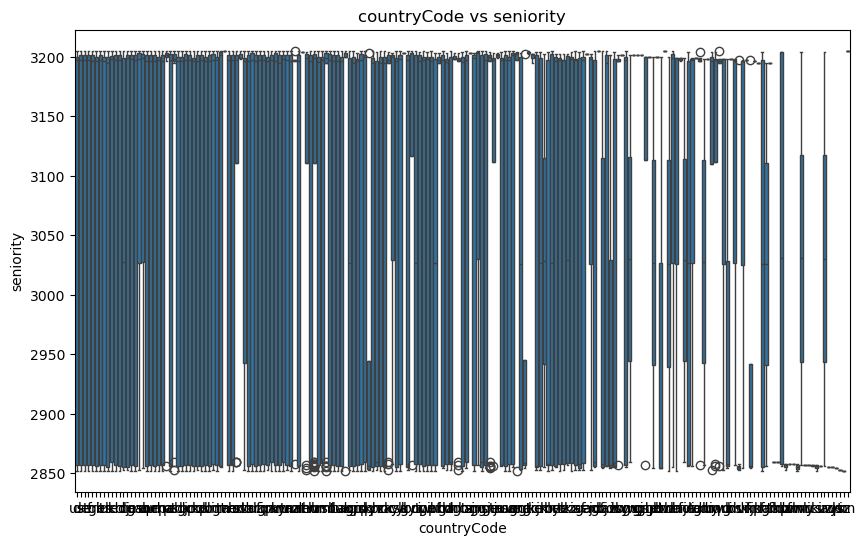

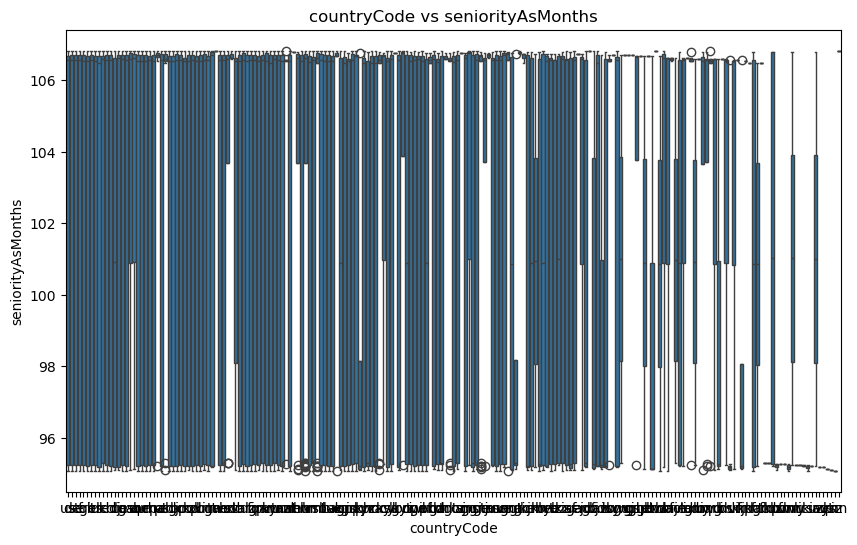

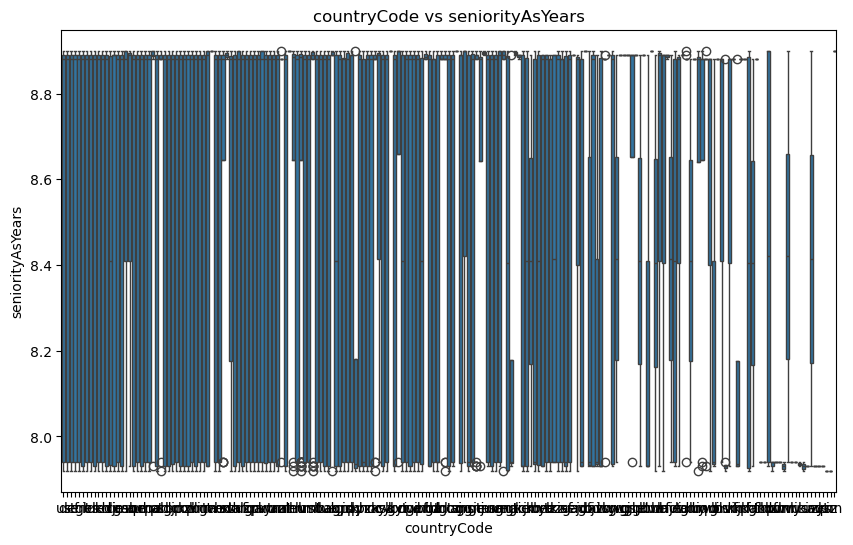

In [ ]:
# 5. 범주형 변수와 수치형 변수 간의 관계 시각화 (Boxplot)
print("\n범주형 변수와 수치형 변수 간의 관계 시각화:")
for col in categorical_columns:
    for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(10, 6))
        sns.*******(x=col, y=num_col, data=df)
        plt.title(f"{col} vs {num_col}")
        plt.show()


이상치 탐지:


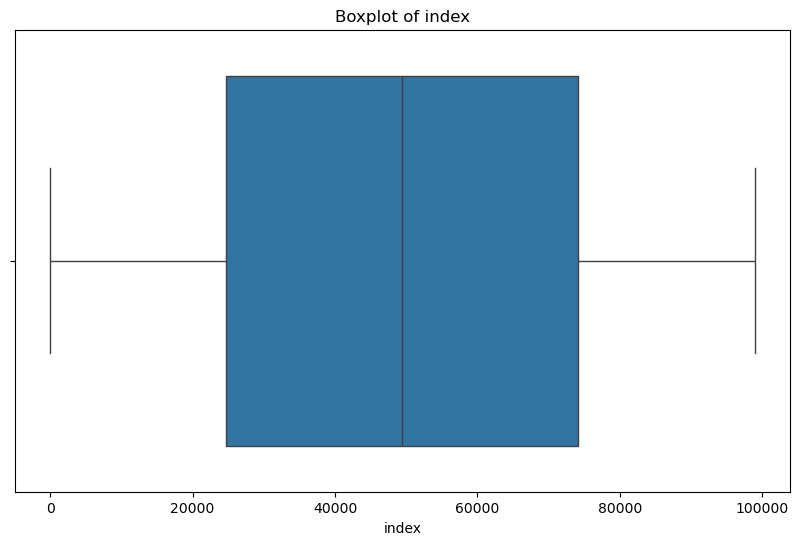

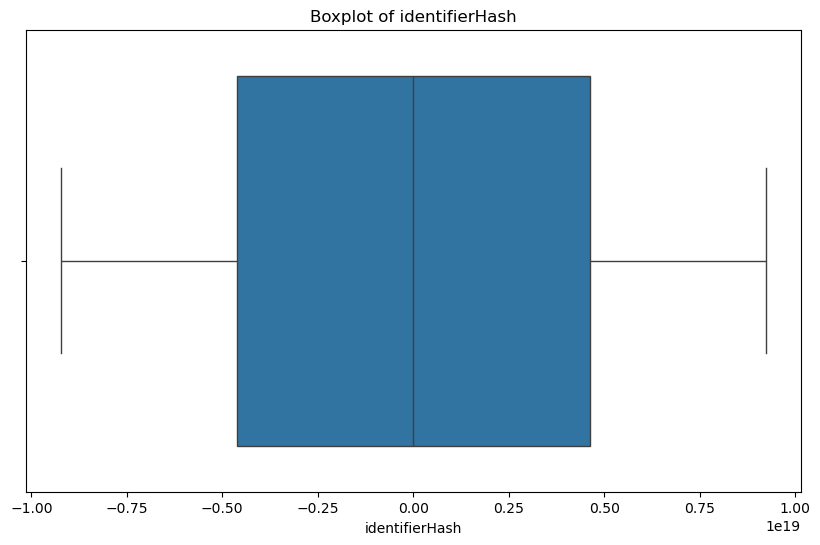

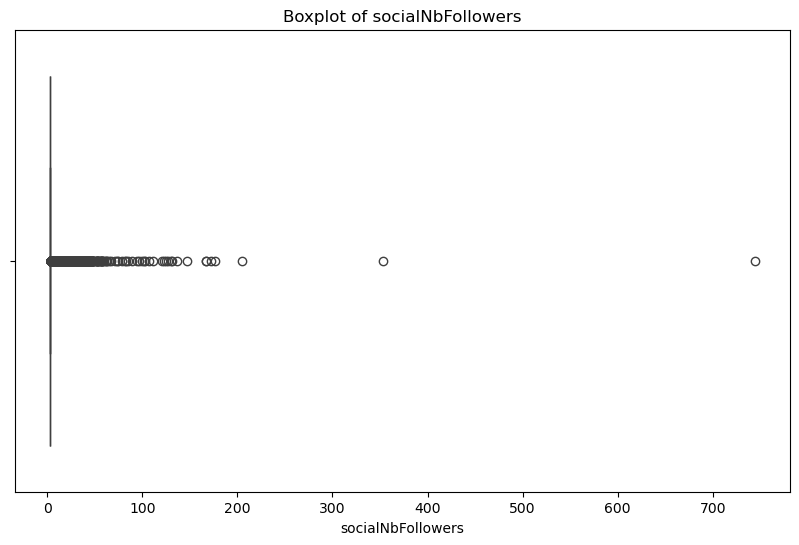

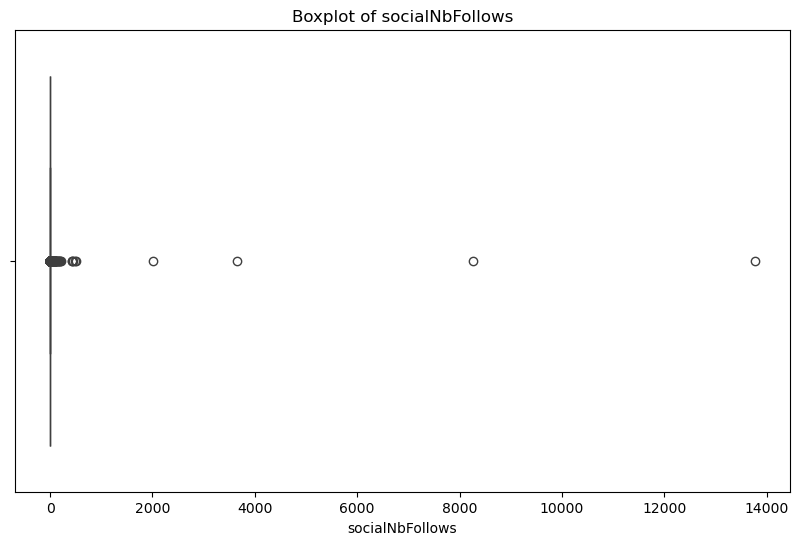

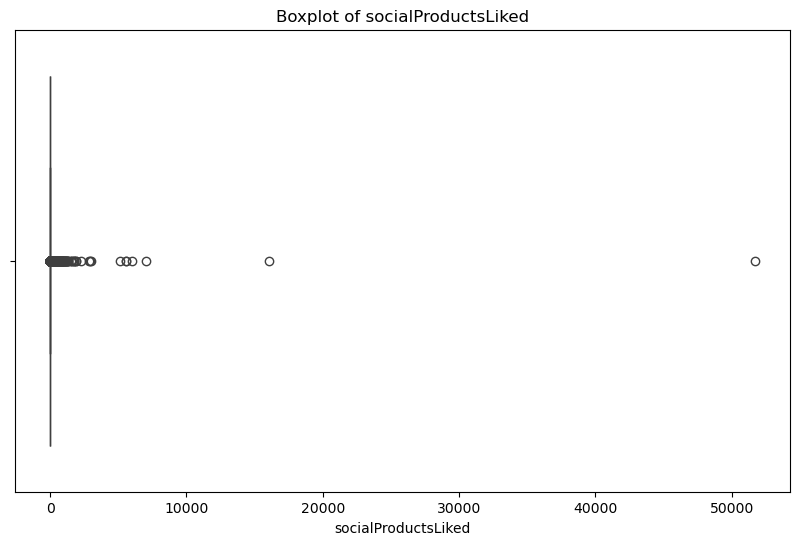

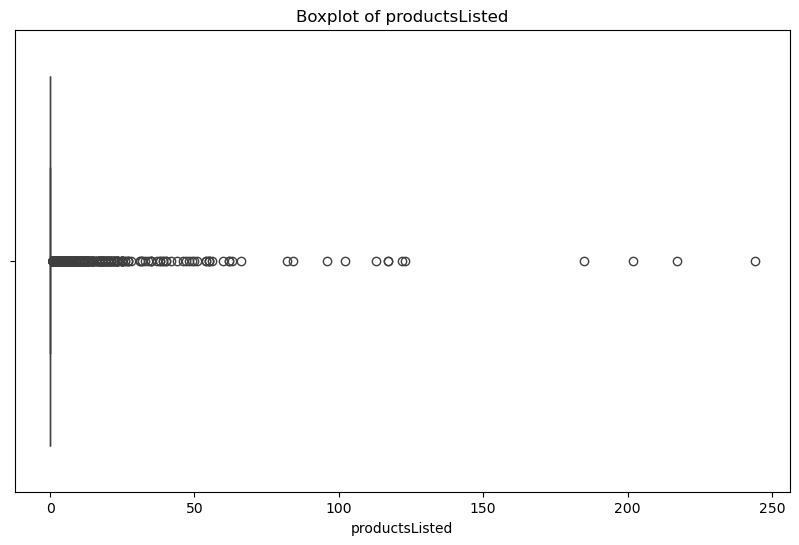

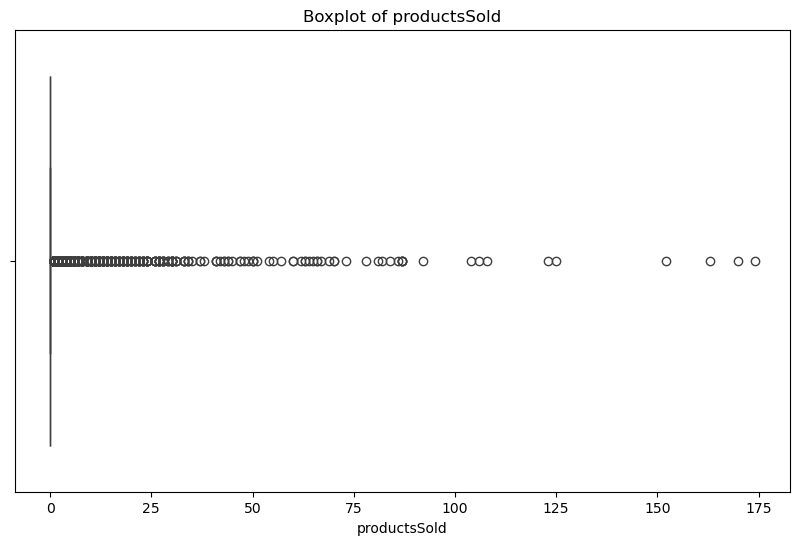

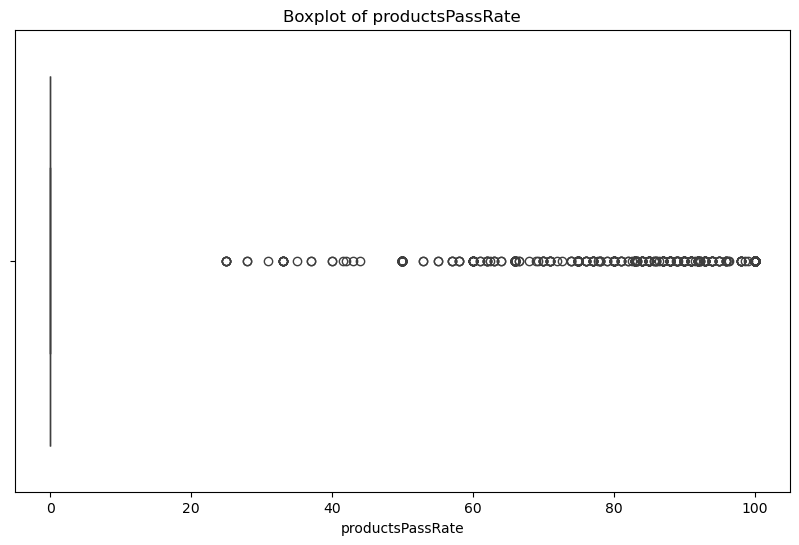

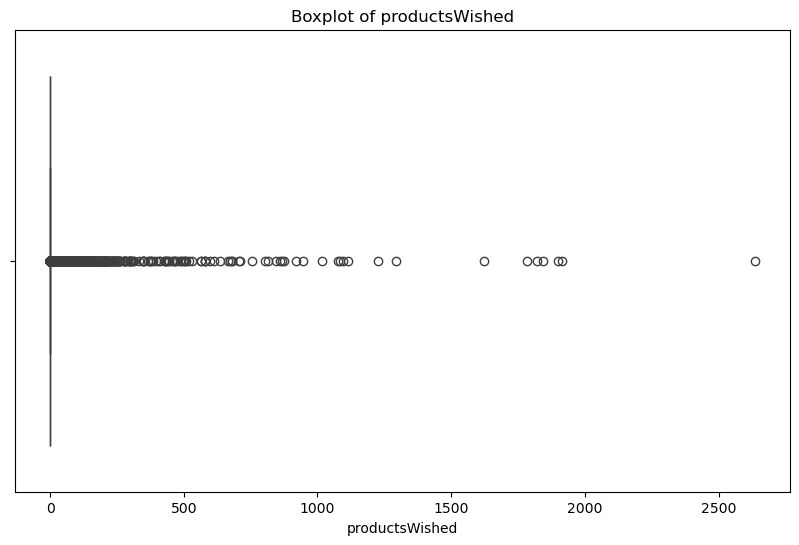

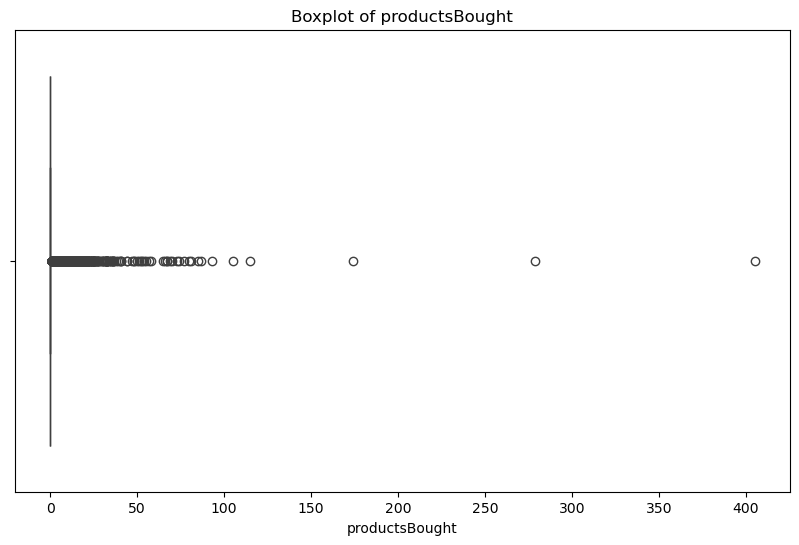

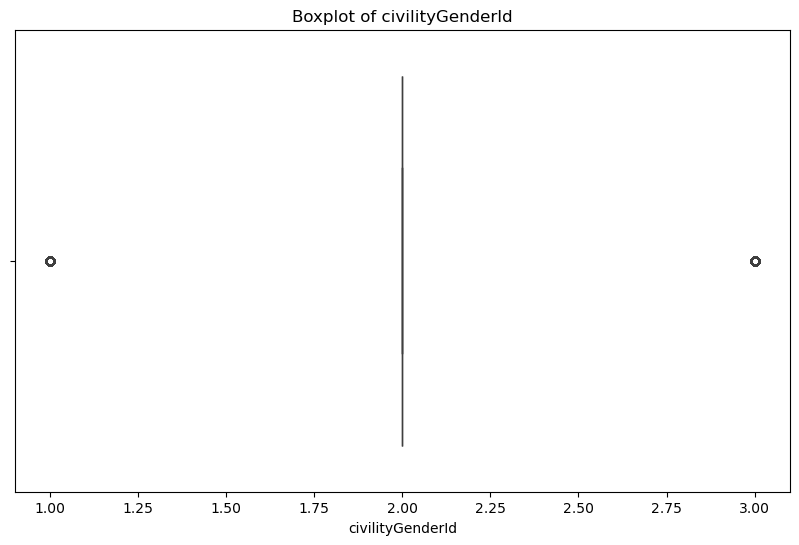

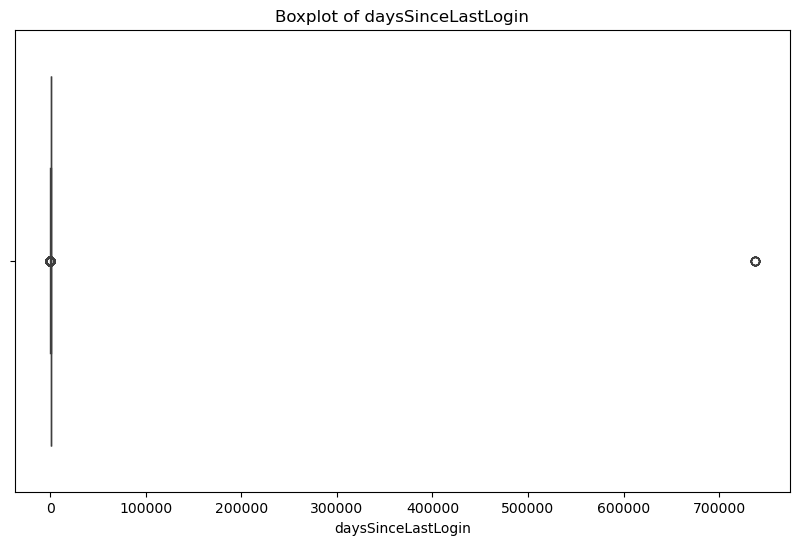

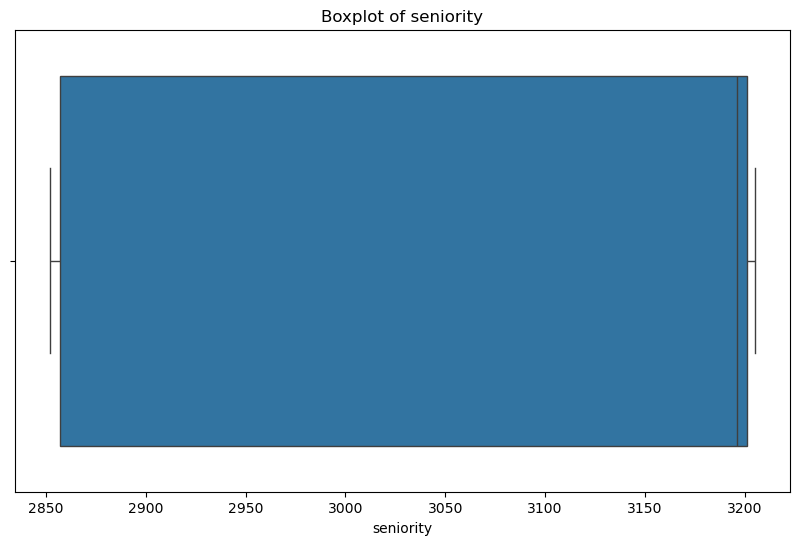

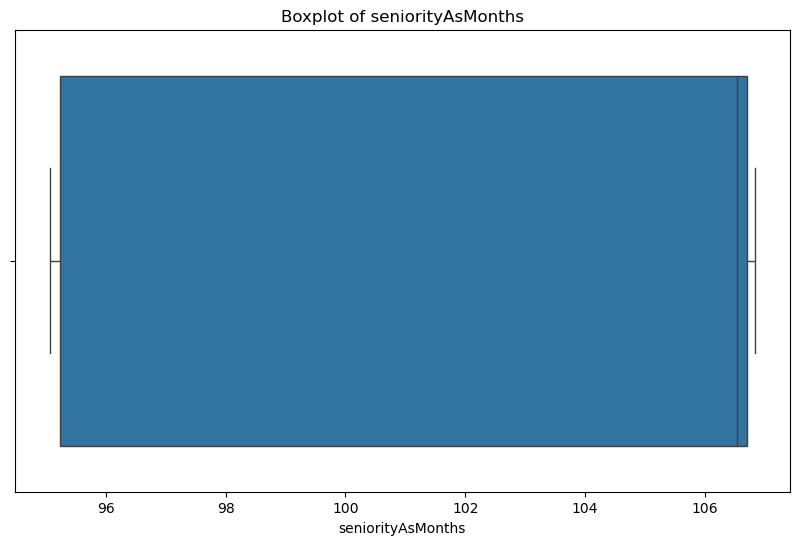

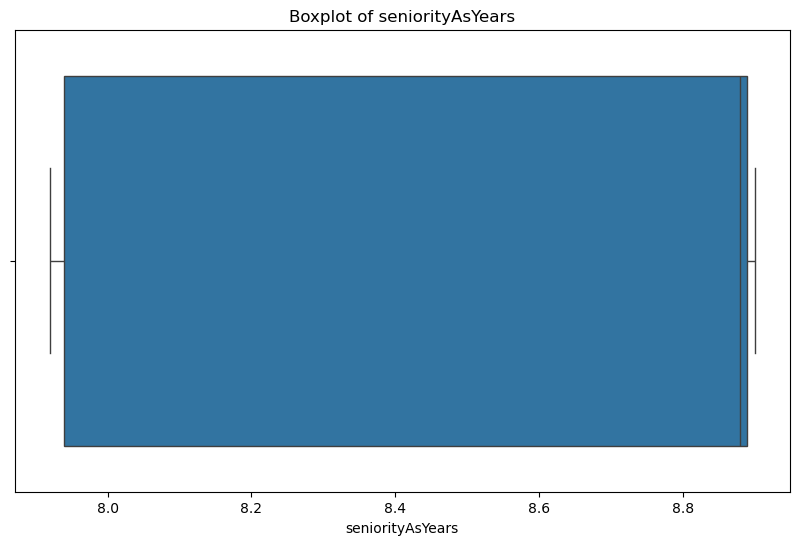

In [ ]:
# 6. 데이터 분포의 이상치 탐지 (Boxplot)
# 실행 완료 될때까지 시간이 좀 걸립니다.
print("\n이상치 탐지:")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.*******(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 원래는 그래프를 하나씩 뜯어보며 EDA를 해야겠지만, EDA를 마쳤다고 가정하고 관심변수와 설명변수를 다음과 같이 임의로 설정하겠습니다.

### 이번 분석에서 사용할 colunm의 정보는 다음과 같습니다.  
#### 관심변수(y)
- productsSold: 판매된 제품 수
#### 설명변수(x)
- **socialNbFollowers: 소셜 미디어 팔로워 수  
- socialNbFollows: 소셜 미디어 팔로우 수  
- productsListed: 등록된 제품 수  
- productsPassRate: 제품 통과율  
- productsWished: 희망 제품 수  
- productsBought: 구매한 제품 수  
- daysSinceLastLogin: 마지막 로그인 후 경과 일수**

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# 필요한 컬럼 선택 및 결측값 제거
# 필요한 컬럼:
# 'productsSold', 'socialNbFollowers', 'socialNbFollows', 'productsListed',
# 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin'
df_selected = *******

# 독립 변수(X)와 종속 변수(y)로 나누기
X = *******
y = *******

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 데이터셋을 훈련 세트와 테스트 세트로 분리
# test_size는 전체의 20%로, random_state는 아무 숫자나 관계없습니다.
X_train, X_test, y_train, y_test = train_test_split(*******)

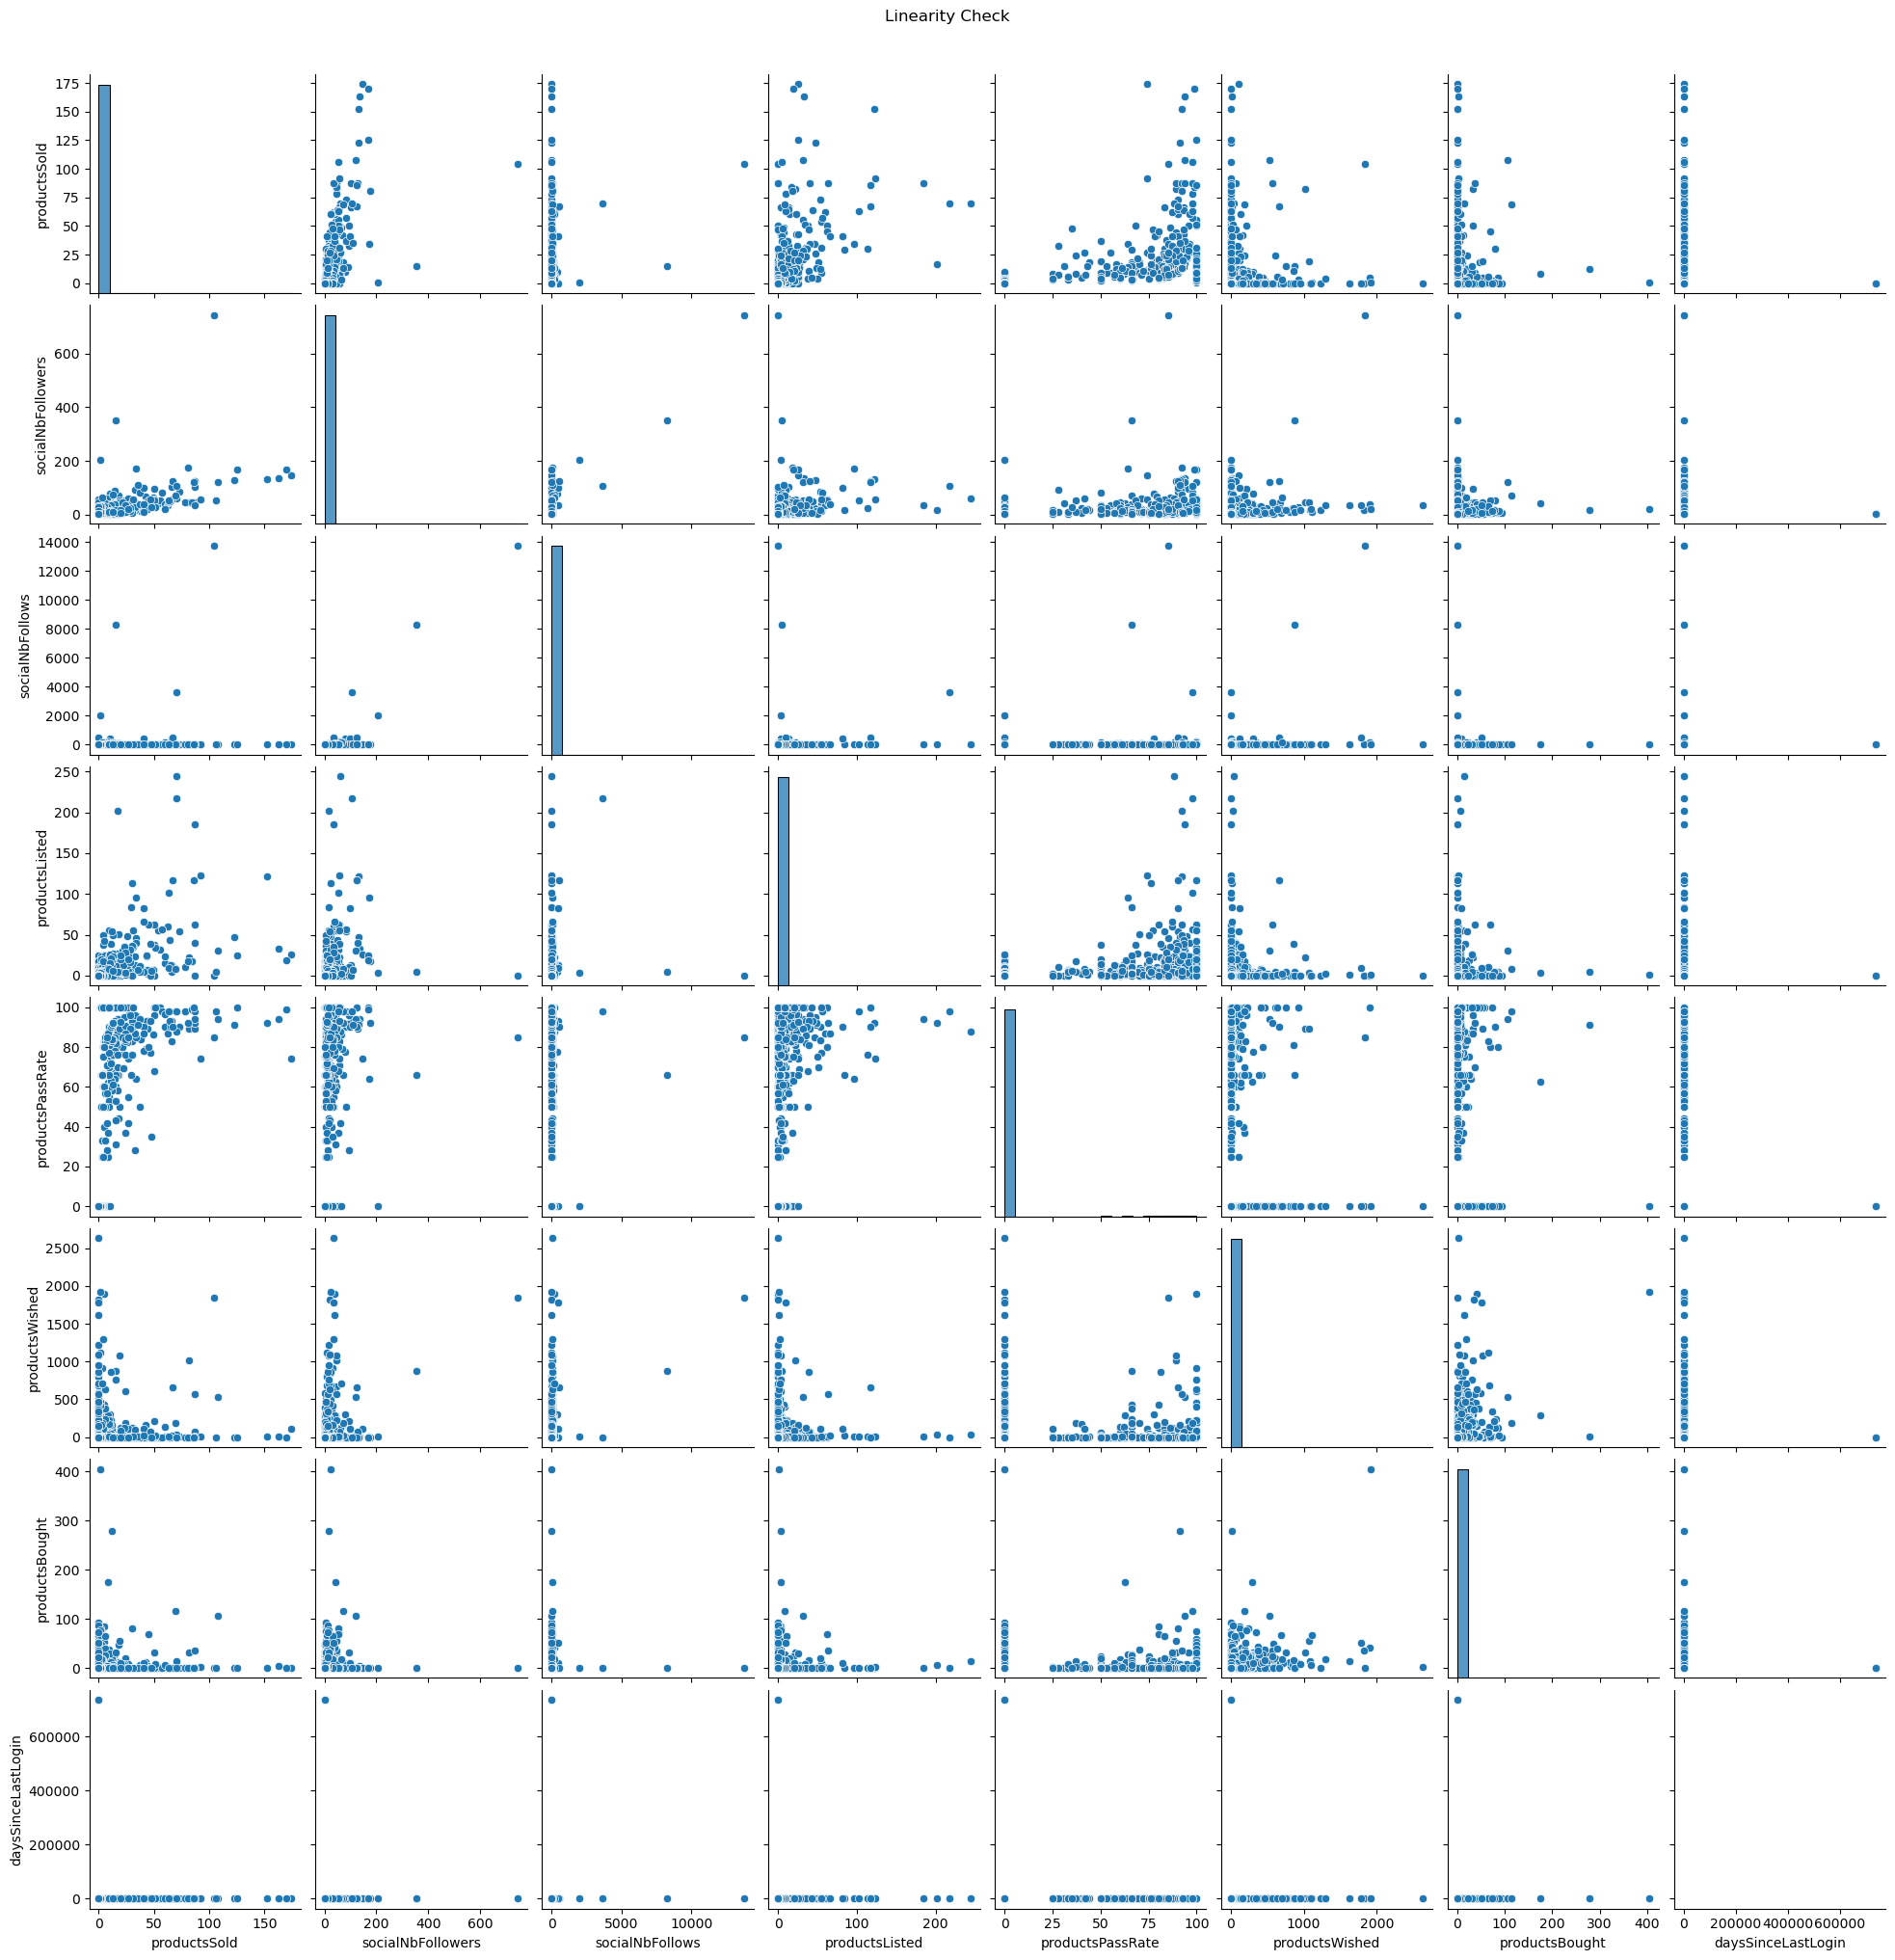

In [ ]:
#잔차의 정규성 확인
#이 코드는 실행 완료되는데 시간이 많이 걸려요. 시간 없으면 실행하지 말고 결과만 보세요
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 간 관계를 시각화하여 선형성 확인
sns.pairplot(df_selected)
plt.suptitle("Linearity Check", y=1.02)
plt.show()

#### 잔차의 정규성도 시각화해서 확인해봅시다.

In [ ]:
# 회귀 모델 생성
model = sm.OLS(y_train, X_train).fit()

In [ ]:
# 테스트 데이터에 대한 예측값
y_pred = model.predict(X_test)

In [ ]:
# 잔차 계산
residuals = y_test - y_pred

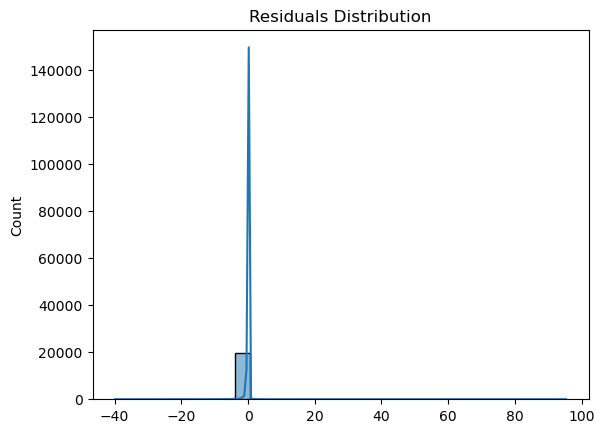

In [ ]:
# 잔차의 분포 시각화
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.show()

이상치 때문에 시각화가 제대로 안 된 모습입니다. 범위를 좁혀서 시각화해봅시다.

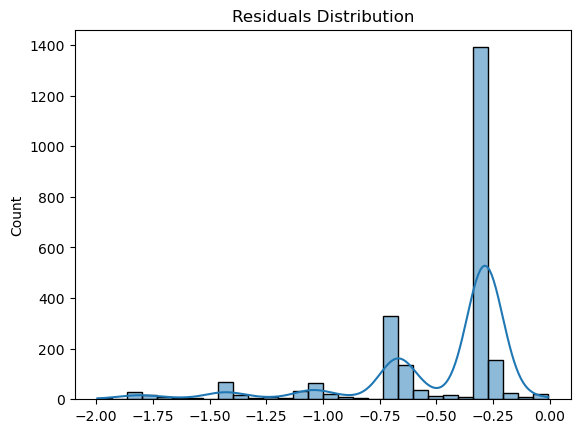

In [ ]:
# 이상치 제거 (예: -2보다 작거나 0보다 큰 잔차만 남기기)
residuals_filtered = residuals[(residuals >= -2) & (residuals <= 0)]
sns.histplot(residuals_filtered, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.show()

특정한 패턴이 보입니다. -> **선형회귀를 이용하지 못 할 가능성 존재**

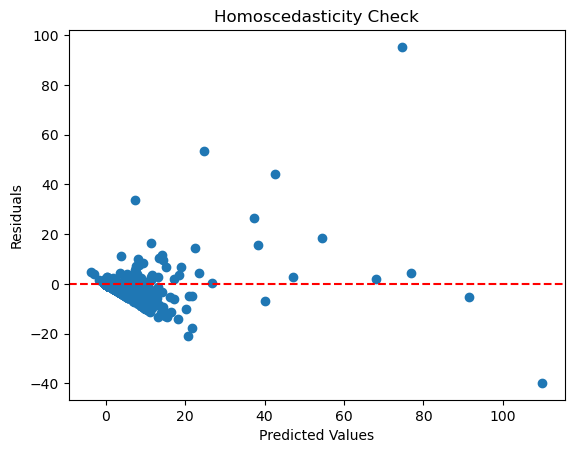

In [ ]:
# 예측값과 잔차의 산점도 시각화
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

#### 그래도 우선 선형회귀모델을 적용해봅시다.

In [ ]:
from sklearn.metrics import r2_score

# 회귀 모델 학습
model = sm.OLS(y_train, X_train).fit()

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 결정계수 (R-squared) 계산
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# 장표 찍는 함수 이용해봅시다.
print(model.*********)

R-squared: 0.7090027349458912
                            OLS Regression Results                            
Dep. Variable:           productsSold   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:54:53   Log-Likelihood:            -1.2970e+05
No. Observations:               79130   AIC:                         2.594e+05
Df Residuals:                   79122   BIC:                         2.595e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

#### 아까 잔차의 분포를 시각화했을 때 특정한 패턴을 보였습니다. 이는 비선형 회귀가 더 fit할 수 있다는 정보입니다. 밑의 코드는 비선형 회귀 중 다항식 회귀를 통해 모델을 만들어 본 것입니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 필요한 컬럼 선택 및 결측값 제거
df_selected = df[['productsSold', 'socialNbFollowers', 'socialNbFollows', 'productsListed', 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin']].dropna()

# 독립 변수(X)와 종속 변수(y)로 나누기
X = df_selected[['socialNbFollowers', 'socialNbFollows', 'productsListed', 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin']]
y = df_selected['productsSold']

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 여기까지는 선형회귀와 같은데, 밑에서 다항식 특징을 생성해줍니다.
# 다항식 특징 생성 (2차 다항식)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# 2차 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 예측값 생성
y_pred = model.predict(X_test_poly)

# 결정계수 (R-squared) 계산
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")



R-squared: -6.031465744640792


In [ ]:
R-squared 값이 음수가 나왔습니다. 이는 모델이 overfitting 되었거나 다중공선성 문제가 발생한 것이라고 할 수 있습니다.
따라서 이 경우에는 선형회귀가 더 적합해보입니다.

## 지금까지 배운 내용을 바탕으로, 얻을 수 있는 인사이트를 정리해봅시다.

**<알 수 있는 사실>**  
예) 0. R-squared값이 0.648이므로, 모델은 관심변수에 대해 64% 정도의 설명력을 제공한다.
1.  
2.  
3.  


### 참고) 추가로, 분류 기초에서 배울 랜덤 포레스트 모델 등을 이용하면 더 높은 R-squared 값을 얻을 수도 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



df_selected = df[['productsSold', 'socialNbFollowers', 'socialNbFollows', 'productsListed', 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin']].dropna()

X = df_selected[['socialNbFollowers', 'socialNbFollows', 'productsListed', 'productsPassRate', 'productsWished', 'productsBought', 'daysSinceLastLogin']]
y = df_selected['productsSold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측값 생성
y_pred = rf_model.predict(X_test)

# 결정계수 (R-squared) 계산
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.8648651705596381
